 ![imagen](../img/imagen1.jpg)

# ¿Nos olvidamos de los residuos que generamos?
## Estudio tasa de reciclado y residuos generados en Europa. Posibles factores influyentes. Fuente: EUROSTAT

### 1. Business case & Data Collection


Este trabajo se centra en el análisis de la generación y tratamiento de residuos urbanos. 
El propósito o destino primero de este análisis está en el análisis y supervisión administrativa, los gobiernos requieren cada vez más de información en el área de sostenibilidad para su gestión. Por lo tanto, abre oportunidades empresariales vinculadas a la mejora en la gestión de datos y también en el área de la economía circular y del empleo verde.

El residuo es un área medioambiental a la que se le ha dado relevancia por la propia necesidad de gestión del mismo. Tanto Unión Europea como ONU encuentran preocupante el aumento y la gestión que se hace del mismo, llegando a considerarse  un Objetivo de  Desarrollo Sostenible (Nº11) y a nivel europeo contar con objetivos de reducción que históricamente no llegan a alcanzarse por los territorios y ciudadanos (en cierto modo ajenos).

Dónde hay un área de trabajo también hay soluciones, las técnicas de gestión del residuo continúan en desarrollo, las políticas públicas van en la misma dirección y la concienciación sobre la reducción en la generación de residuos va en aumento. Por último, como parte clave de este engranaje está la economía circular, que toma como inputs de producción los propios residuos, reduce la generación ecodiseñando o mejorando la forma de consumo. 

En un primer momento, se planteaba analizar el caso español llegando al detalle autonómico y tomar la estadística de la Unión Europea como referencia. Se ha modificado el enfoque priorizando en el análisis europeo ya que aporta una estadística sobre reciclado más simple que permite profundizar en factores que se relacionan con ella como el PIB o la inversión en generar valor ambiental.
 Se incluye serie temporal de cada uno de los países desde 2000 hasta 2021 para dar más valor al análisis. 

La fuente de datos es Eurostat junto a la creación de una categorización de grupos de países de elaboración propia.



### 2. Data Understanding
1. **Exploratorio inicial**: en este momento realizaremos un primer análisis de las variables que tenemos en el dataset, obteniendo la información básica. Se importan los datos y hace back up de los data frames generados.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_3= pd.read_csv("../data/3.protection_GDP.csv", sep=',', encoding='latin1')
# fuente_3 = "Gross value added in environmental good and services. EUROSTAT"
#https://ec.europa.eu/eurostat/databrowser/view/sdg_12_61__custom_10871879/default/table?lang=en

df_4 = pd.read_csv("../data/4.tasa_reciclaje_europea.csv", sep=';', encoding='latin1')
# fuente_4 = "Recycling rate of municipal waste.EUROSTAT"
#https://ec.europa.eu/eurostat/databrowser/view/cei_wm011/default/table?lang=en&category=cei.cei_wm

df_5 = pd.read_csv("../data/5.residuos_europa.csv", sep=';', encoding='latin1')
# fuente_5 = "Generation of municipal waste per capita. EUROSTAT"
#https://ec.europa.eu/eurostat/databrowser/view/cei_pc031/default/table?lang=en&category=cei.cei_pc

df_6= pd.read_csv("../data/conversion_eurostat_country.csv", sep=';', encoding='latin1')
# data set creado por mí para obtener una equivalencia de siglas de país con nombre de país.

df_7= pd.read_csv("../data/7.GDP_per_capita.csv", sep=',', encoding='latin1')
# fuente_7 = "Real GDP per capita. EUROSTAT"
#https://ec.europa.eu/eurostat/databrowser/view/sdg_08_10/default/table

In [23]:
df3bu=df_3.copy()
df4bu=df_4.copy()
df5bu=df_5.copy()
df6bu=df_6.copy()
df7bu=df_7.copy()


### 3. Data Cleaning
Se exploran los data set, se eliminan columnas innecesarias y se renombran para mejor claridad las necesarias. También se evalúan nulos.

In [24]:
# Lista de columnas a eliminar
columnas_a_eliminar = ['DATAFLOW','LAST UPDATE', 'freq', 'nace_r2', 'ceparema', 'na_item', 'ty','unit', 'OBS_FLAG']

# Eliminar las columnas especificadas
df_3 = df_3.drop(columns=columnas_a_eliminar)

# Cambiar el nombre de la columna OBS_VALUE a otra más explicativa
df_3.rename(columns={'OBS_VALUE': 'Valor añadido ambiental respecto al PIB %'}, inplace=True)

In [25]:
# Lista de columnas a eliminar
columnas_a_eliminar = ['DATAFLOW','LAST UPDATE', 'freq', 'na_item','unit', 'OBS_FLAG']

# Eliminar las columnas especificadas
df_7 = df_7.drop(columns=columnas_a_eliminar)

# Cambiar el nombre de la columna OBS_VALUE a otra más explicativa
df_7.rename(columns={'OBS_VALUE': 'PIB per capita'}, inplace=True)

Se unen los dos data frame

In [26]:
# Fusionar los DataFrames
df_37 = pd.merge(df_7, df_3, on=['geo', 'TIME_PERIOD'], how='left')
df_37.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 4 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   geo                                        846 non-null    object 
 1   TIME_PERIOD                                846 non-null    int64  
 2   PIB per capita                             846 non-null    int64  
 3   Valor añadido ambiental respecto al PIB %  301 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 26.6+ KB


Hay un número elevado de países sin dato de Valor añadido ambiental. Esta variable se podrá analizar de 2017 a 2021.

In [27]:
# Filtrar el DataFrame para mostrar solo las filas donde la columna tiene valores nulos
valores_nulos = df_37[df_37["Valor añadido ambiental respecto al PIB %"].isnull()]

# Mostrar los valores nulos
print("Valores nulos en 'Valor añadido ambiental respecto al PIB %':")
print(valores_nulos)


Valores nulos en 'Valor añadido ambiental respecto al PIB %':
    geo  TIME_PERIOD  PIB per capita  \
0    AL         2000            1700   
1    AL         2001            1850   
2    AL         2002            1940   
3    AL         2003            2060   
4    AL         2004            2180   
..   ..          ...             ...   
841  UK         2015           31780   
842  UK         2016           32060   
843  UK         2017           32430   
844  UK         2018           32640   
845  UK         2019           32910   

     Valor añadido ambiental respecto al PIB %  
0                                          NaN  
1                                          NaN  
2                                          NaN  
3                                          NaN  
4                                          NaN  
..                                         ...  
841                                        NaN  
842                                        NaN  
843             

#### Data Frame 4


También revisamos data frame 4. Los datos tienen un formato válido, pero limpiamos celdas que no aportan información útil.

In [28]:
# Lista de columnas a eliminar
columnas_a_eliminar = ['DATAFLOW','LAST UPDATE', 'freq', 'unit', 'OBS_FLAG','wst_oper']

# Eliminar las columnas especificadas
df_4 = df_4.drop(columns=columnas_a_eliminar)

# Mostrar el DataFrame después de eliminar las columnas
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   geo          733 non-null    object 
 1   TIME_PERIOD  733 non-null    int64  
 2   OBS_VALUE    733 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 17.3+ KB


Vamos a añadir columna country de df_4 al df_5 para hacer más fácil en el análisis la identificación del país.

In [29]:
# Fusionar los DataFrames df_4 y df_5 en función de la columna "geo"
df_4 = pd.merge(df_4, df_6[['geo', 'country','group']], on='geo', how='left')

# Mostrar el DataFrame fusionado
print(df_4)


    geo  TIME_PERIOD  OBS_VALUE  country group
0    AL         2020       18.1  Albania  East
1    AL         2021       18.7  Albania  East
2    AL         2022       18.9  Albania  East
3    AT         2000       63.4  Austria  West
4    AT         2001       64.3  Austria  West
..   ..          ...        ...      ...   ...
728  TR         2020       12.3   Turkey   NAN
729  TR         2021       12.3   Turkey   NAN
730  XK         2020        0.0  Kosovo*  East
731  XK         2021        2.5  Kosovo*  East
732  XK         2022        2.6  Kosovo*  East

[733 rows x 5 columns]


También cambiamos el nombre de la columna OBS_Value para facilitar su interpretación.

In [30]:
# Cambiar el nombre de la columna OBS_VALUE a otra más explicativa
df_4.rename(columns={'OBS_VALUE': 'tasa reciclaje %'}, inplace=True)

# Mostrar el DataFrame con el nombre de columna cambiado
print(df_4)

    geo  TIME_PERIOD  tasa reciclaje %  country group
0    AL         2020              18.1  Albania  East
1    AL         2021              18.7  Albania  East
2    AL         2022              18.9  Albania  East
3    AT         2000              63.4  Austria  West
4    AT         2001              64.3  Austria  West
..   ..          ...               ...      ...   ...
728  TR         2020              12.3   Turkey   NAN
729  TR         2021              12.3   Turkey   NAN
730  XK         2020               0.0  Kosovo*  East
731  XK         2021               2.5  Kosovo*  East
732  XK         2022               2.6  Kosovo*  East

[733 rows x 5 columns]


Realizamos los mismos pasos en data frame 5. Los datos tienen un formato válido, pero limpiamos celdas que no aportan información útil.

In [32]:
df_5.info()

# Lista de columnas a eliminar
columnas_a_eliminar = ['DATAFLOW', 'LAST UPDATE', 'freq', 'unit', 'OBS_FLAG', 'wst_oper']

# Eliminar las columnas especificadas
df_5 = df_5.drop(columns=columnas_a_eliminar)

# Mostrar el DataFrame después de eliminar las columnas
df_5.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   DATAFLOW         788 non-null    object
 1   LAST UPDATE      788 non-null    object
 2   freq             788 non-null    object
 3   wst_oper         788 non-null    object
 4   unit             788 non-null    object
 5   geo              788 non-null    object
 6   TIME_PERIOD      788 non-null    int64 
 7   residuos_kg_hab  788 non-null    int64 
 8   OBS_FLAG         126 non-null    object
dtypes: int64(2), object(7)
memory usage: 55.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   geo              788 non-null    object
 1   TIME_PERIOD      788 non-null    int64 
 2   residuos_kg_hab  788 non-null    int64 
dtypes: int64(2), obj

También vamos a mejorar la interpretación de la columna OBS_var cambiandole el nombre.

In [33]:
# Cambiar el nombre de la columna OBS_VALUE a residuos_kg_hab
df_5.rename(columns={'OBS_VALUE': 'residuos_kg_hab'}, inplace=True)

df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   geo              788 non-null    object
 1   TIME_PERIOD      788 non-null    int64 
 2   residuos_kg_hab  788 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 18.6+ KB


Viendo que df_4 y df_5 aportan datos por país respecto a residuos reciclados y tasa de reciclaje se unen en un único Data Frame para facilitar el análisis. 


In [34]:
# Fusionar los DataFrames
df_eurostat = pd.merge(df_4, df_5, on=['geo', 'TIME_PERIOD'], how='left')

# Generar copia de seguridad
df_eurostat_copy1=df_eurostat.copy()

Se evalúan nulos y países con escasos datos

In [35]:
# Filtrar el DataFrame para mostrar solo las filas donde la columna tiene valores nulos
valores_nulos = df_eurostat[df_eurostat["residuos_kg_hab"].isnull()]

# Mostrar los valores nulos
print("Valores nulos en 'Valor añadido ambiental respecto al PIB %':")
print(valores_nulos)


Valores nulos en 'Valor añadido ambiental respecto al PIB %':
    geo  TIME_PERIOD  tasa reciclaje %  country group  residuos_kg_hab
732  XK         2022               2.6  Kosovo*  East              NaN


In [36]:
# Contar el número de datos en la columna "geo" para cada país
conteo_datos_por_pais = df_eurostat.groupby('country')['geo'].count()

# Obtener los nombres de los países que tienen al menos 22 datos en la columna "geo"
paises_con_suficientes_datos = conteo_datos_por_pais[conteo_datos_por_pais >= 22].index.tolist()

# Filtrar el DataFrame para mantener solo las filas de los países con suficientes datos
df_eurostat_filtrado = df_eurostat[df_eurostat['country'].isin(paises_con_suficientes_datos)]

# Mostrar el DataFrame filtrado
print(df_eurostat_filtrado)


    geo  TIME_PERIOD  tasa reciclaje %   country group  residuos_kg_hab
3    AT         2000              63.4   Austria  West            580.0
4    AT         2001              64.3   Austria  West            576.0
5    AT         2002              62.5   Austria  West            608.0
6    AT         2003              64.2   Austria  West            607.0
7    AT         2004              57.4   Austria  West            574.0
..   ..          ...               ...       ...   ...              ...
719  SK         2018              36.3  Slovakia  East            414.0
720  SK         2019              38.5  Slovakia  East            421.0
721  SK         2020              45.3  Slovakia  East            478.0
722  SK         2021              48.9  Slovakia  East            497.0
723  SK         2022              49.5  Slovakia  East            478.0

[635 rows x 6 columns]


Generar grupos de zonas geográficas

In [37]:
# Agrupar los datos por la columna "group" y obtener los países correspondientes a cada grupo
for group, group_data in df_eurostat_filtrado.groupby("group"):
    # Obtener los países únicos para el grupo actual
    paises_grupo = group_data["country"].unique()
    
    # Imprimir el nombre del grupo y los países correspondientes
    print(f"Grupo: {group}")
    print(", ".join(paises_grupo))
    print()  # Imprimir una línea en blanco entre grupos

Grupo: Baltic
Estonia, Lithuania, Latvia

Grupo: East
Bulgaria, Czechia, Hungary, Poland, Romania, Slovenia, Slovakia

Grupo: NAN
EU27_2020

Grupo: North
Denmark, Finland, Norway, Sweden

Grupo: South
Cyprus, Greece, Spain, Italy, Malta, Portugal

Grupo: West
Austria, Belgium, Switzerland, Germany, France, Luxembourg, Netherlands



Se incorpora el df_37 con datos de PIB y protección ambiental al data frame de eurostat

In [38]:
df_eurostat_full = pd.merge(df_eurostat_filtrado, df_37, on=['geo', 'TIME_PERIOD'], how='left')

In [40]:
# Eliminar las filas donde el valor de la columna "group" sea el texto "NAN"
df_eurostat_full = df_eurostat_full[df_eurostat_full['group'] != 'NAN']

# Mostrar información actualizada del DataFrame
print(df_eurostat_full.info())


<class 'pandas.core.frame.DataFrame'>
Index: 612 entries, 0 to 634
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   geo                                        612 non-null    object 
 1   TIME_PERIOD                                612 non-null    int64  
 2   tasa reciclaje %                           612 non-null    float64
 3   country                                    612 non-null    object 
 4   group                                      612 non-null    object 
 5   residuos_kg_hab                            612 non-null    float64
 6   PIB per capita                             612 non-null    float64
 7   Valor añadido ambiental respecto al PIB %  269 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 43.0+ KB
None


A tener en cuenta que 2022 tiene datos de casi todas las columnas, en aportación valor añadido al PIB solo 3 datos, así que habrá que tenerlo en cuenta.

In [41]:
# Filtrar el DataFrame para mostrar solo las filas donde la columna tiene valores nulos
valores_nulos = df_eurostat_full[df_eurostat_full["Valor añadido ambiental respecto al PIB %"].isnull()]

# Mostrar los valores nulos
print("Valores nulos en 'Valor añadido ambiental respecto al PIB %':")
print(valores_nulos)

# Obtener los países que tienen valores nulos en la columna "country"
paises_con_valores_nulos = valores_nulos['country'].unique()

# Mostrar los países con valores nulos en la columna "country"
print(paises_con_valores_nulos)


Valores nulos en 'Valor añadido ambiental respecto al PIB %':
    geo  TIME_PERIOD  tasa reciclaje %   country group  residuos_kg_hab  \
0    AT         2000              63.4   Austria  West            580.0   
1    AT         2001              64.3   Austria  West            576.0   
2    AT         2002              62.5   Austria  West            608.0   
3    AT         2003              64.2   Austria  West            607.0   
4    AT         2004              57.4   Austria  West            574.0   
..   ..          ...               ...       ...   ...              ...   
626  SK         2014              10.4  Slovakia  East            320.0   
627  SK         2015              14.9  Slovakia  East            329.0   
628  SK         2016              23.0  Slovakia  East            348.0   
629  SK         2017              29.8  Slovakia  East            378.0   
634  SK         2022              49.5  Slovakia  East            478.0   

     PIB per capita  Valor añadido am

Por último, se observa que 2022 es un año del que no todos los países tienen datos, por ello, trabajaremos excluyendo este año.





In [42]:
# Hacer copia de seguridad
df_eurostat_full_con_2022= df_eurostat_full.copy()

# Filtrar el DataFrame para excluir el periodo de tiempo 2022
df_eurostat_full = df_eurostat_full[df_eurostat_full['TIME_PERIOD'] != 2022]

# Verificar que se han excluido los datos del periodo de tiempo 2022
print(df_eurostat_full['TIME_PERIOD'].unique())


[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021]


### Data Cleaning (Fase 2)
Estudio de outliers empleando histogramas, diagramas de caja, cuartiles, rangos.

Se generan las columnas de categorías y numéricas. Para evaluar anomalías.

In [43]:
columnas_categoricas_euro= ["country",'TIME_PERIOD','group']
columnas_numericas_euro = ["tasa reciclaje %","residuos_kg_hab","Valor añadido ambiental respecto al PIB %", "PIB per capita"]

#### Analisis de anomalías variables categóricas


A nivel categórico vemos datos no distribuidos  homogéneamente, en Dinamarca, se mantiene ya que falta un dato.

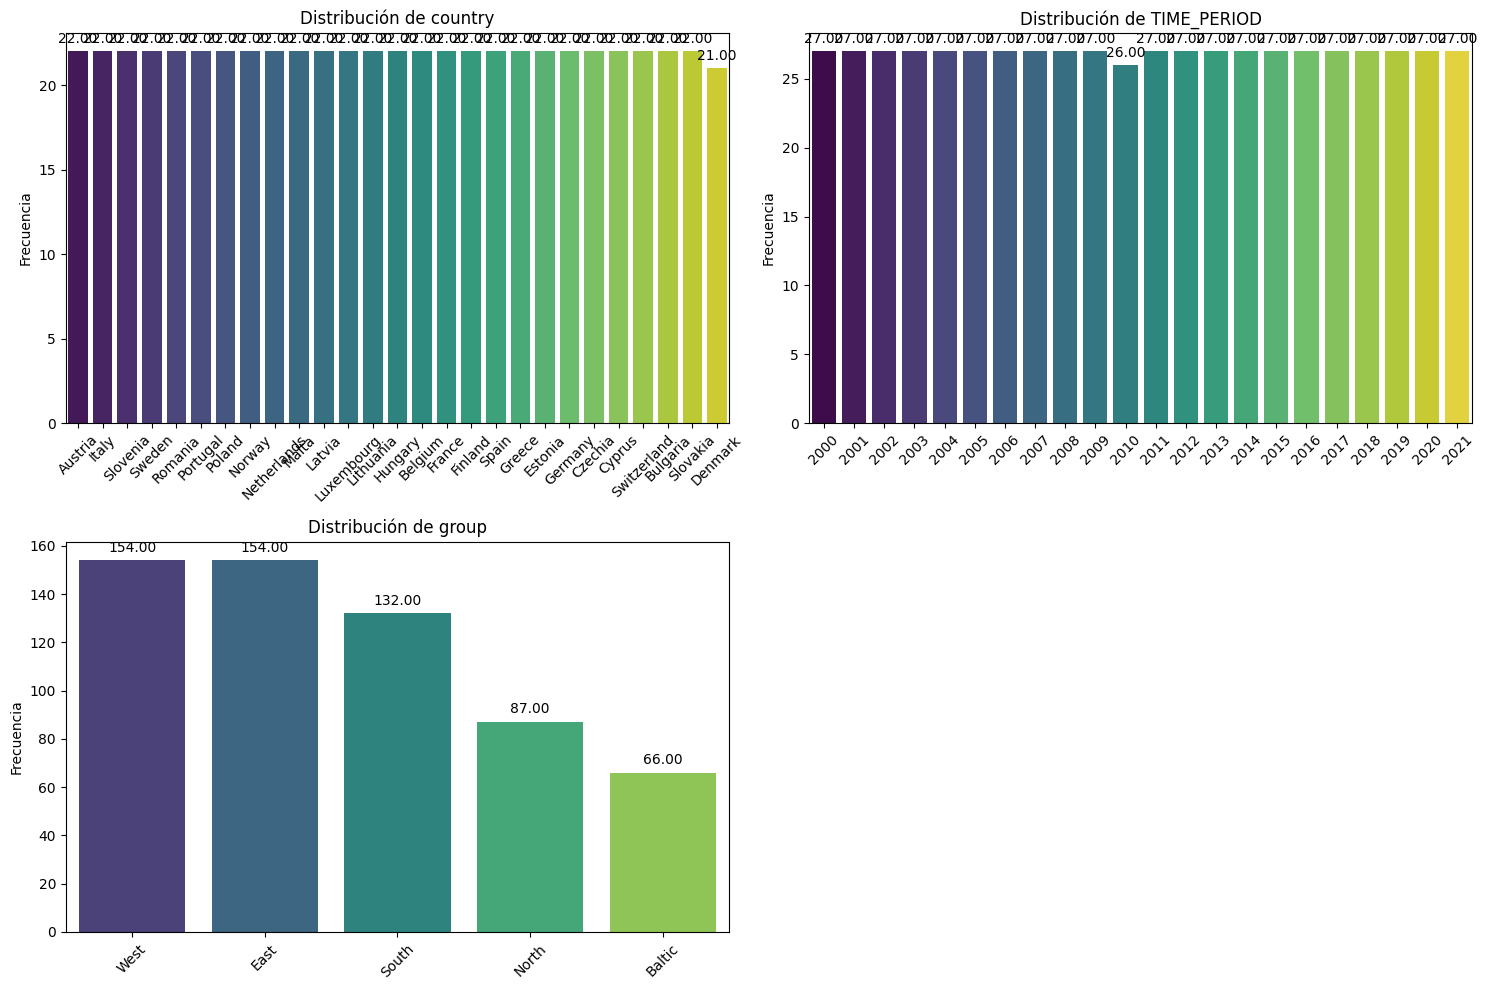

In [44]:
import sys
sys.path.insert(0, '../utils')

from bootcampviztools import pinta_distribucion_categoricas
# Llamar a la función con df_eurostat y las columnas adecuadas
pinta_distribucion_categoricas(df_eurostat_full, columnas_categoricas_euro,mostrar_valores=True)


#### Análisis outliers variables numéricas

El histograma y boxplot de tasa de reciclaje muestran una distribución de dos jorobas, que podría indicarse que es La distribución bimodal, puede surgir en situaciones donde los datos provienen de dos poblaciones diferentes o subgrupos dentro de una población que tienen diferentes características. En este caso, podría indicar que hay tendencias de tasas de reciclado muy diferentes. Adicionalmente, los datos se encuentran algo más desviados  a la izquierda.

El histograma y boxplot de residuos kg habitante muestran una distribución bastante centrada, ligeramente a la izquierda y con una forma que no llega a ser normal pero se acerca. Sugiere una distribución bastante balanceada, sin grandes sesgos en los datos.

El histograma y boxplot de valor añadido ambiental está sesgado a la derecha, la mayoría de los valores se encuentran en el lado de la izquierda , aunque con una distribución que se acerca  a la normal, esta distribución uniforme practicamente a su vez presenta en el box plot outliers fuera del bigote máximo. Se van a revisar aunque podrían ser los valores NaN que el data set inicial no proveía de dato en ciertos países.

El histograma y boxplot de PIB per capita, presenta tendencia sesgada a la derecha, la mayoría de valores se encuentran a la izquierda y el boxplot presentan outliers en valores muy elevados y alejados de los bigotes, que no son especialmente largos.

(4, 2)


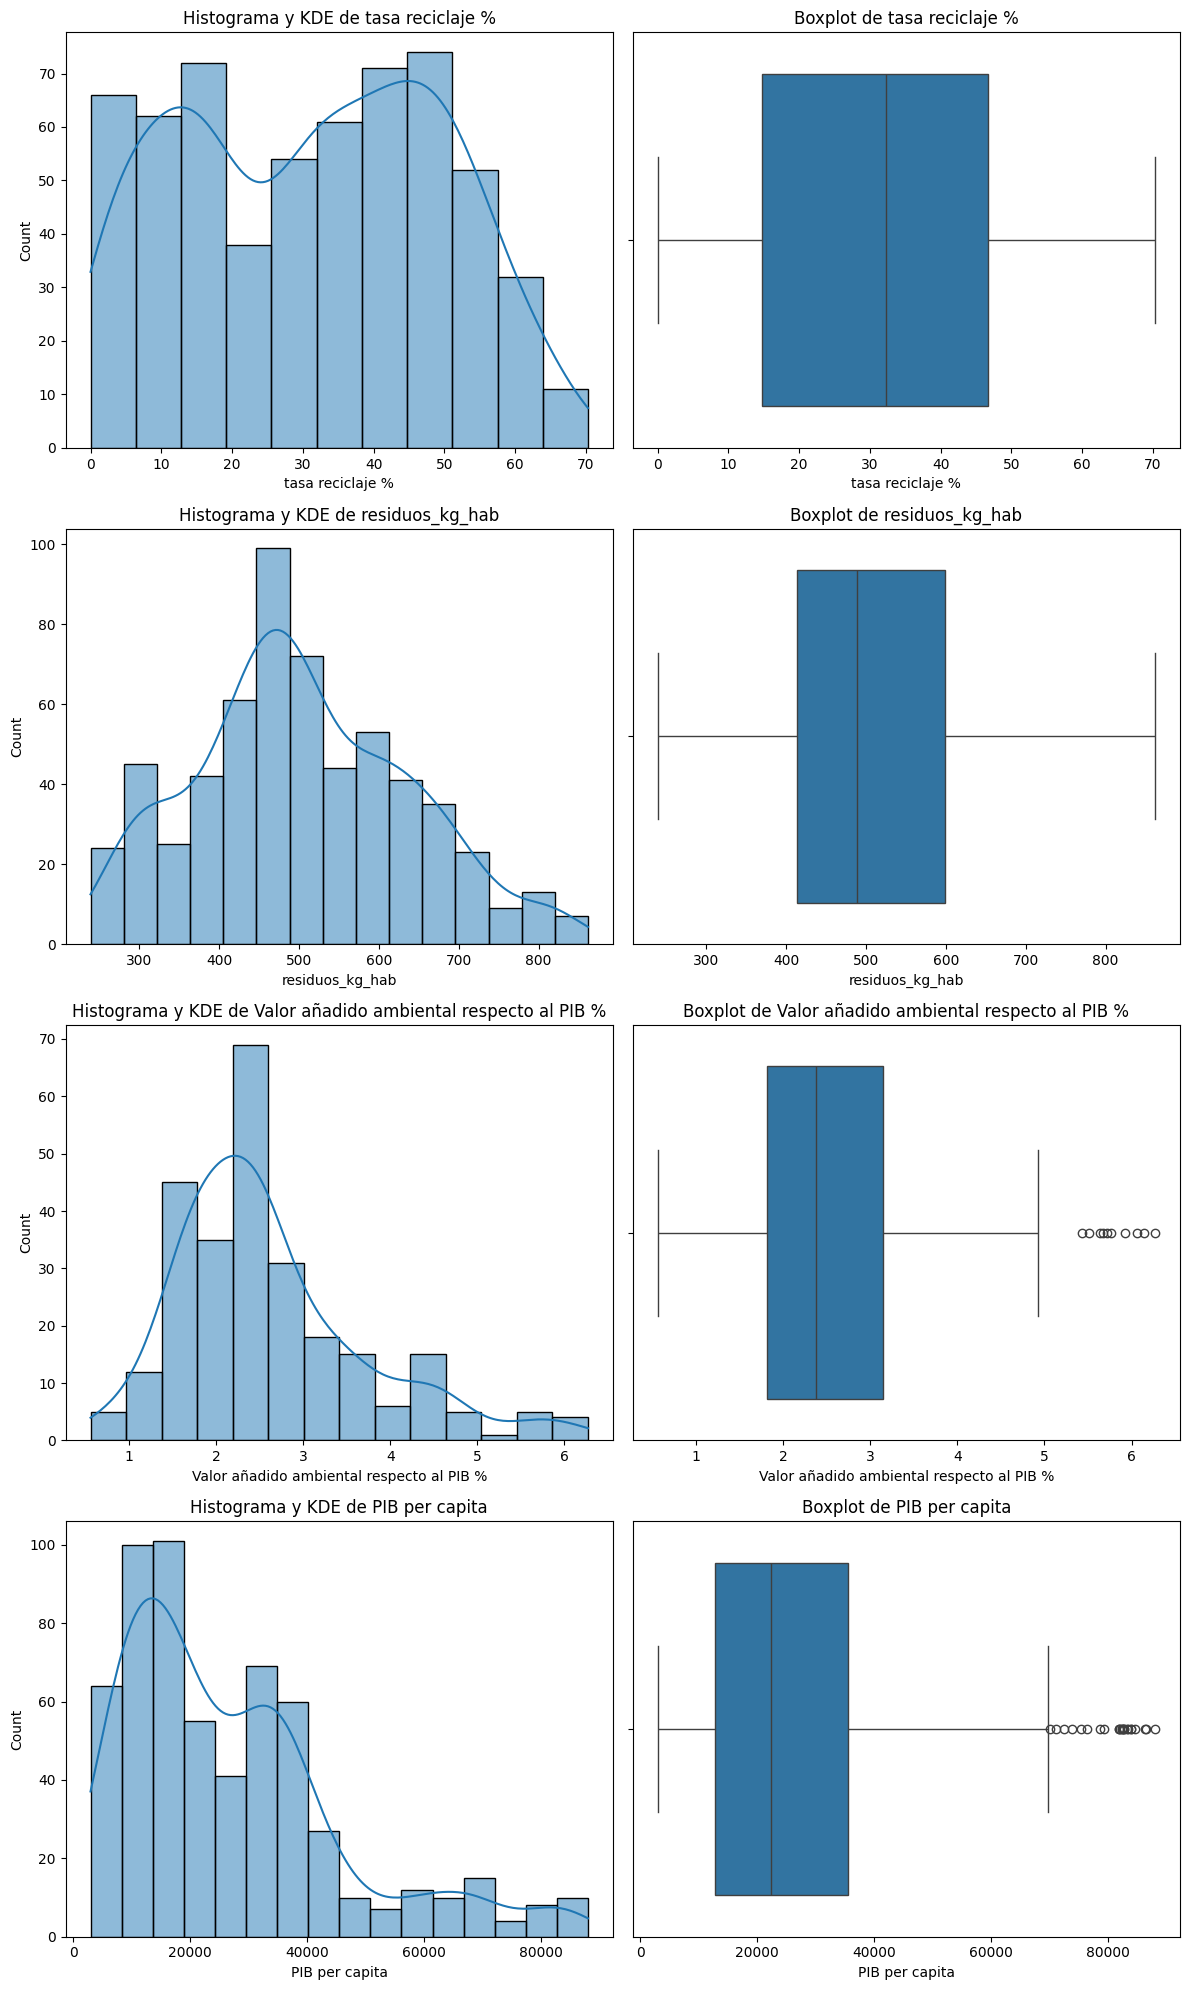

In [73]:
import sys
sys.path.insert(0, '../utils')

from bootcampviztools import plot_combined_graphs
plot_combined_graphs(df_eurostat_full, columnas_numericas_euro)

Se revisan los outliers de estos datos. En esta memoria se muestra un caso como ejemplo, el resto se encuentran en la versión larga Mermoa_Tasa_reciclado_UE

Observando que la tasa de reciclado tiene dos subgrupos, se van a imprimir los de tasa menor a 20% y los de mayor a 40%. Slovakia, por ejemplo ha evolucionado de un 5% en el año 2000 a un 49% en 2021

In [45]:
# Filtrar los datos dentro del rango 
datos_filtrados = df_eurostat_full[(df_eurostat_full['tasa reciclaje %'] < 20)] 

# Obtener los nombres únicos de los países en ese rango
paises_en_rango_bajo = datos_filtrados['country'].unique()

# Mostrar los países en ese rango
print("Países con valores de tasa de reciclado menor o igual a 20%:")
print(paises_en_rango_bajo)

Países con valores de tasa de reciclado menor o igual a 20%:
['Bulgaria' 'Cyprus' 'Czechia' 'Estonia' 'Greece' 'Spain' 'Hungary'
 'Italy' 'Lithuania' 'Latvia' 'Malta' 'Poland' 'Portugal' 'Romania'
 'Slovenia' 'Slovakia']


Evaluamos los datos realizando corte por países según resultados residuos kg hab

In [46]:
# Calcular la media de residuos por habitante por país
media_residuos_por_pais = df_eurostat_full.groupby('country')['residuos_kg_hab'].mean()

# Calcular los percentiles de la media de residuos por habitante en todo el conjunto de datos
percentiles = media_residuos_por_pais.quantile([0.25, 0.50, 0.75])

# Función para asignar el grupo basado en los percentiles y calcular el rango de residuos
def asignar_grupo(media):
    if media <= percentiles[0.25]:
        grupo = 'Grupo 1 perc.0-0.25'
        rango = f'{media_residuos_por_pais.min():.2f} - {percentiles[0.25]:.2f}'
    elif percentiles[0.25] < media <= percentiles[0.50]:
        grupo = 'Grupo 2 perc.0.25-0.50'
        rango = f'{percentiles[0.25]:.2f} - {percentiles[0.50]:.2f}'
    elif percentiles[0.50] < media <= percentiles[0.75]:
        grupo = 'Grupo 3 perc.0.50-0.75'
        rango = f'{percentiles[0.50]:.2f} - {percentiles[0.75]:.2f}'
    else:
        grupo = 'Grupo 4 perc.0.75-1'
        rango = f'{percentiles[0.75]:.2f} - {media_residuos_por_pais.max():.2f}'
    return grupo, rango

# Aplicar la función para asignar el grupo correspondiente a cada país
grupos, rangos = zip(*media_residuos_por_pais.apply(asignar_grupo))

# Crear un DataFrame con los resultados
df_grupos_pais_residuos = pd.DataFrame({
    'country': media_residuos_por_pais.index,
    'Grupo residuos/hab': grupos,
    'Rango de residuos (kg/hab)': rangos
})
df_grupos_pais_residuos

country      Grupo residuos/hab Rango de residuos (kg/hab)
0       Austria     Grupo 4 perc.0.75-1            582.36 - 771.95
1       Belgium  Grupo 2 perc.0.25-0.50            421.68 - 507.50
2      Bulgaria  Grupo 3 perc.0.50-0.75            507.50 - 582.36
3        Cyprus     Grupo 4 perc.0.75-1            582.36 - 771.95
4       Czechia     Grupo 1 perc.0-0.25            309.14 - 421.68
5       Denmark     Grupo 4 perc.0.75-1            582.36 - 771.95
6       Estonia     Grupo 1 perc.0-0.25            309.14 - 421.68
7       Finland  Grupo 2 perc.0.25-0.50            421.68 - 507.50
8        France  Grupo 3 perc.0.50-0.75            507.50 - 582.36
9       Germany     Grupo 4 perc.0.75-1            582.36 - 771.95
10       Greece  Grupo 2 perc.0.25-0.50            421.68 - 507.50
11      Hungary     Grupo 1 perc.0-0.25            309.14 - 421.68
12        Italy  Grupo 3 perc.0.50-0.75            507.50 - 582.36
13       Latvia     Grupo 1 perc.0-0.25            309.14 - 421.68
14    Lithuania  Grupo 2 perc.0.25-0.50            421.68 - 507.50
15   Luxembourg     Grupo 4 perc.0.75-1            582.36 - 771.95
16        Malta     Grupo 4 perc.0.75-1            582.36 - 771.95
17  Netherlands  Grupo 3 perc.0.50-0.75            507.50 - 582.36
18       Norway  Grupo 3 perc.0.50-0.75            507.50 - 582.36
19       Poland     Grupo 1 perc.0-0.25            309.14 - 421.68
20     Portugal  Grupo 2 perc.0.25-0.50            421.68 - 507.50
21      Romania     Grupo 1 perc.0-0.25            309.14 - 421.68
22     Slovakia     Grupo 1 perc.0-0.25            309.14 - 421.68
23     Slovenia  Grupo 2 perc.0.25-0.50            421.68 - 507.50
24        Spain  Grupo 3 perc.0.50-0.75            507.50 - 582.36
25       Sweden  Grupo 2 perc.0.25-0.50            421.68 - 507.50
26  Switzerland     Grupo 4 perc.0.75-1            582.36 - 771.95

In [47]:
df_eurostat_full = df_eurostat_full.merge(df_grupos_pais_residuos, on='country', how='left')


### 4. Analysis

*Análisis univariante*: estadísticos de centralidad: media, mediana, moda, cuartiles y percentiles, estadísticos de dispersión: varianza, desviación estándar, rango, mínimo y máximo, gráficas: Tablas de frecuencias, histogramas, función densidad de probabilidad, diagrama de caja, diagrama de barras, violin plot, swarm plot.       
        
*Análisis bivariante*: agrupando y generando gráficas summary tables , scatter plots, diagrama de barras, cross table o binning
    
*Análisis multivariante*: ver de manera gráfica la relación de todas con todas, heatmap de correlación, grid de gráficas mediante pairplot.


#### 1. Análisis univariante.

#### Análisis univariante categórico: no hay variables a estudiar identificadas.

Se actualizan las categóricas y numéricas

In [48]:
columnas_categoricas_euro= ["country",'TIME_PERIOD','group','Grupo residuos/hab','Rango de residuos (kg/hab)']
columnas_numericas_euro = ["tasa reciclaje %","residuos_kg_hab","Valor añadido ambiental respecto al PIB %", "PIB per capita"]


#### Análisis univariante numérico

In [49]:
df_eurostat_full.describe()

TIME_PERIOD  tasa reciclaje %  residuos_kg_hab  PIB per capita  \
count   593.000000        593.000000       593.000000      593.000000   
mean   2010.500843         31.085497       504.139966    27073.305228   
std       6.354963         18.365146       134.216076    18814.688964   
min    2000.000000          0.000000       239.000000     2990.000000   
25%    2005.000000         14.800000       414.000000    12740.000000   
50%    2011.000000         32.300000       489.000000    22370.000000   
75%    2016.000000         46.700000       599.000000    35630.000000   
max    2021.000000         70.300000       862.000000    88120.000000   

       Valor añadido ambiental respecto al PIB %  
count                                 266.000000  
mean                                    2.614737  
std                                     1.101777  
min                                     0.560000  
25%                                     1.820000  
50%                                     2.375000  
75%                                     3.150000  
max                                     6.270000

Índice Intercuartílico:
Un valor intercuartílico alto generalmente indica una mayor dispersión o variabilidad en los datos, mientras que un valor intercuartílico bajo indica una menor dispersión o variabilidad. Parece que el Valor añadido ambiental respecto al PIB %  es el único que se puede considerar bajo, con 1.34. Hay menos países con datos.

Rango: Hay que tener en cuenta que hay valores con dato % por lo tanto el rango puede verse más reducido.

Coeficiente de variación: Si es menor a 15% se considera bajo, entre 15-30% moderado y superior a 30% alto. En este caso, la tasa de reciclaje,el valor añadido ambiental respecto al PIB y el PIB per capita superan el 30%, la variabilidad se considera relativamente alta. Los residuos por habitante con un valor del 0.26 estarían dentro del rango donde la variabilidad se considera moderada

Llama la atención que la columna Valor añadido ambiental respecto a PIB tenga alta variabilidad viendo IQR,STD o rango, lo cual podría deberse a valores atípicos, en concreto los Nan que ya tenemos identificados.

In [50]:
# Calcular el rango para cada columna numérica en df_eurostat1221
rango = df_eurostat_full.describe().loc["max"] - df_eurostat_full.describe().loc["min"]

# Calcular el rango intercuartílico (IQR) para la columna seleccionada
import sys
sys.path.insert(0, '../utils')

from formulas import get_IQR
resultado_IQR = get_IQR(df_eurostat_full, columnas_numericas_euro)

# Calcular la variabilidad para las columnas seleccionadas
def variabilidad(df, col):
    df_var = df.describe().loc[["std","mean"]].T
    df_var['variabilidad'] = df_var["std"] / df_var["mean"]
    return df_var

resultado_variabilidad = variabilidad(df_eurostat_full[columnas_numericas_euro], 'variabilidad')
print(resultado_variabilidad)

# Crear un DataFrame con los resultados
tabla_resultados = pd.DataFrame({
    'Rango': rango,
    'IQR': resultado_IQR,
    'Variabilidad': resultado_variabilidad['variabilidad']
})

# Mostrar la tabla de resultados
print(tabla_resultados)


                                                    std          mean  \
tasa reciclaje %                              18.365146     31.085497   
residuos_kg_hab                              134.216076    504.139966   
Valor añadido ambiental respecto al PIB %      1.101777      2.614737   
PIB per capita                             18814.688964  27073.305228   

                                           variabilidad  
tasa reciclaje %                               0.590795  
residuos_kg_hab                                0.266228  
Valor añadido ambiental respecto al PIB %      0.421372  
PIB per capita                                 0.694954  
                                              Rango       IQR  Variabilidad
PIB per capita                             85130.00  22890.00      0.694954
TIME_PERIOD                                   21.00       NaN           NaN
Valor añadido ambiental respecto al PIB %      5.71      1.33      0.421372
residuos_kg_hab                         

Se continúa con histogramas, aparte de lo ya observado en el apartado de limpieza de outliers que ya ha planteado algunas ideas

Aparentemente se observa una tendencia ligeramente semejante entre valor añadido ambiental respecto al PIB y generación de residuo (habría que hacer una máscara y no tener en cuenta los Nan). Se revisará la correlación. También se observa diferente  distibución entre tasa de reciclaje y generación de residuos per capita, entre otras.

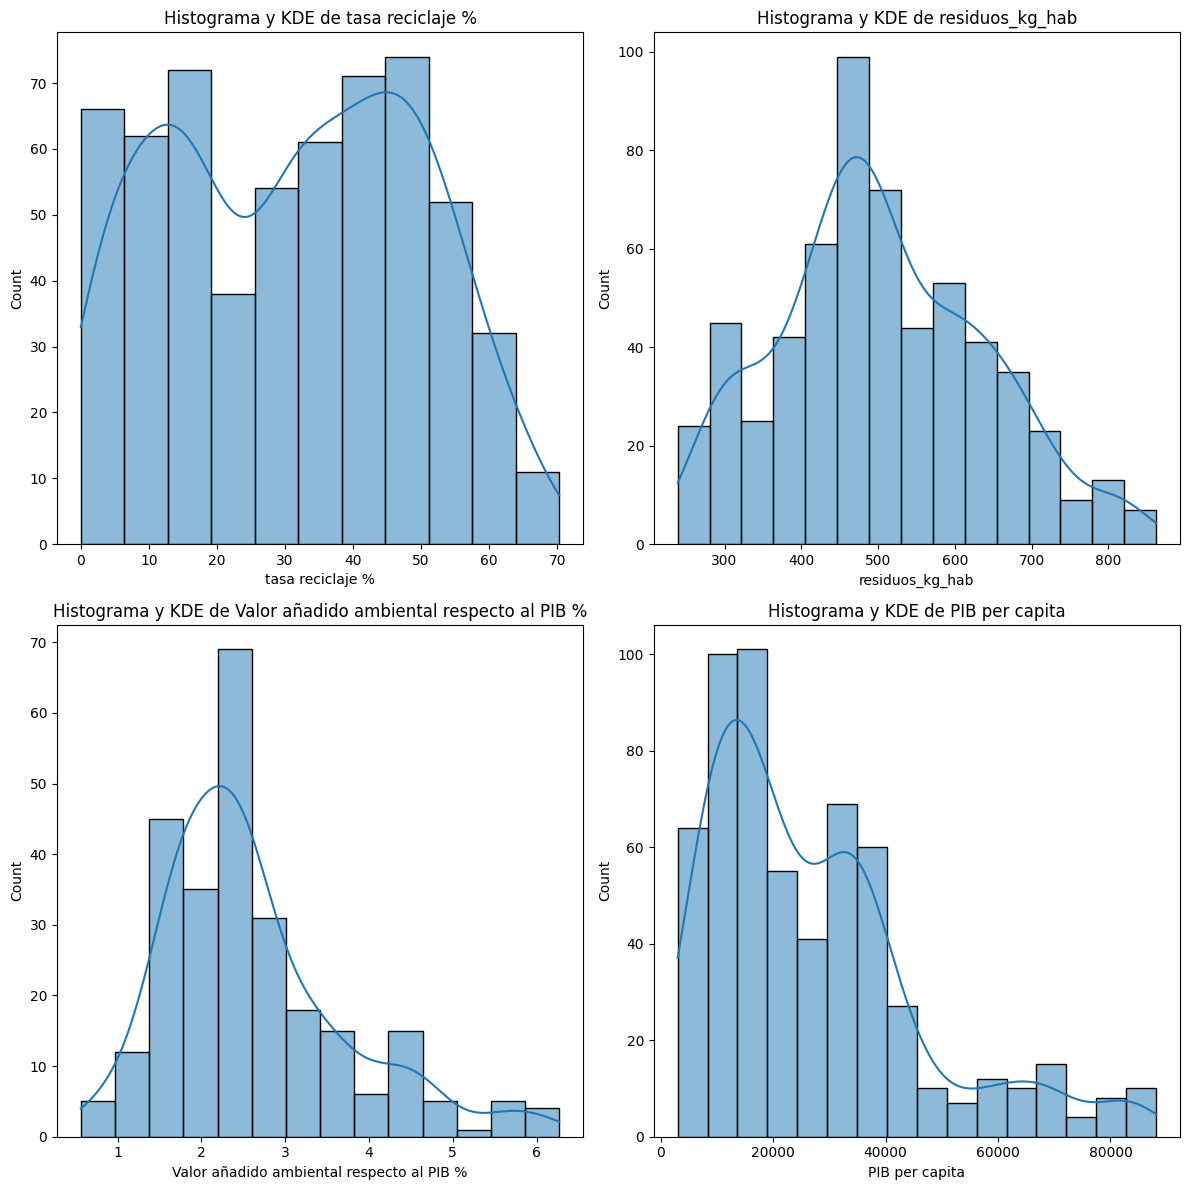

In [51]:
def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])	
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

plot_histo_den(df_eurostat_full,columnas_numericas_euro)

Ahora vamos a valorar si aislando el dato de los años 2018 a 2021 vemos cambios especialmente en el histograma de tasa de reciclaje. Efectivamente, nos permite observar datos con menos variación. El histograma muestra unos datos más cercanos a distribuciones normal con tendencia a concentrarse a la izquierda, salvo tasa de reciclaje, más a la derecha.

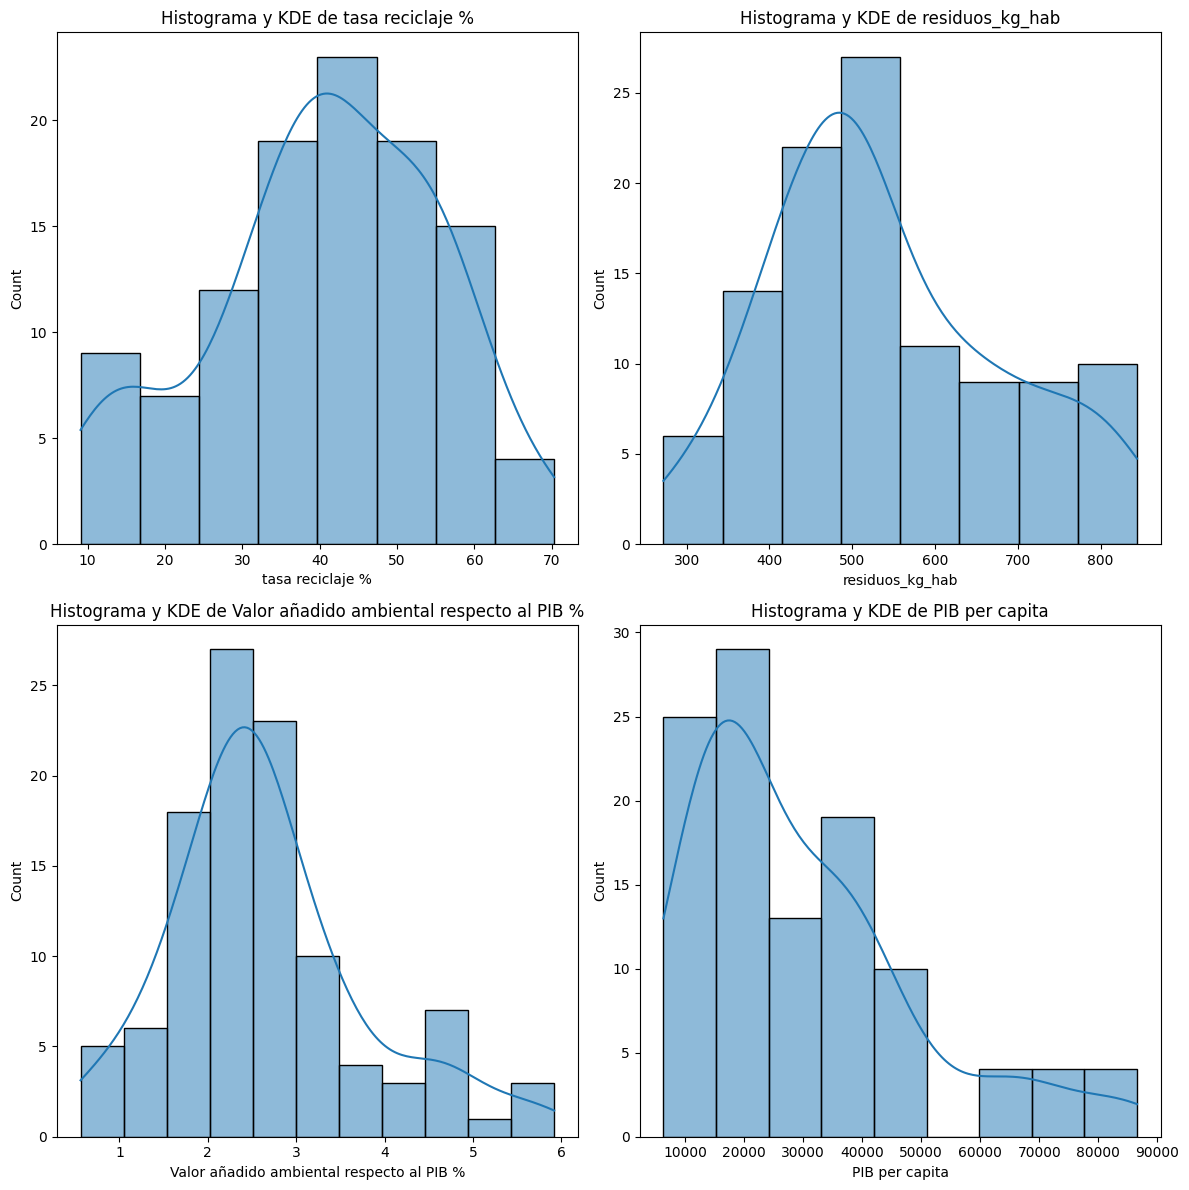

In [52]:
df_eurostat_full_1821 = df_eurostat_full[(df_eurostat_full['TIME_PERIOD'] >= 2018) & (df_eurostat_full['TIME_PERIOD'] <= 2021)]

plot_histo_den(df_eurostat_full_1821,columnas_numericas_euro)

#### 2.Análisis bivariante.

2.1. Agrupar por un campo categórico y calcular estadísticos como el conteo, la media, suma...
    
    


**Se realiza un doble proceso, para el data frame 2000-2021 y para el data frame 2018-2021. En la memoria presente se reducen a lo indispensable los datos de 2018-2021 para simplificar contenido.**

In [53]:
df_eurostat_full.groupby("group")["tasa reciclaje %"].describe()

count       mean        std   min     25%    50%     75%   max
group                                                                 
Baltic   66.0  19.303030  14.991433   0.0   4.925  20.10  28.275  52.6
East    154.0  19.532468  14.851310   0.0   7.475  15.65  31.725  60.8
North    87.0  41.570115   5.358738  30.6  38.250  41.80  45.700  57.6
South   132.0  20.202273  11.959221   3.0  11.200  17.10  29.400  51.9
West    154.0  51.093506   9.408699  24.5  46.425  52.40  56.900  70.3

In [55]:
df_eurostat_full.groupby("group")["residuos_kg_hab"].describe()

count        mean         std    min     25%    50%    75%    max
group                                                                    
Baltic   66.0  388.621212   53.310344  271.0  350.50  391.5  433.0  483.0
East    154.0  387.305195   97.679771  239.0  307.25  380.0  457.0  612.0
North    87.0  563.413793  144.576652  361.0  458.50  491.0  683.0  862.0
South   132.0  549.007576   85.781855  412.0  480.25  521.5  633.5  729.0
West    154.0  598.538961   93.288514  409.0  533.25  593.5  663.0  835.0

In [57]:
df_eurostat_full.groupby("group")["Valor añadido ambiental respecto al PIB %"].describe()

count      mean       std   min     25%    50%     75%   max
group                                                               
Baltic   28.0  3.041071  1.049735  1.73  2.2775  2.710  4.0500  4.92
East     60.0  2.071500  0.677342  0.56  1.6200  2.300  2.4525  4.12
North    33.0  4.106364  1.187613  2.79  3.2500  3.510  5.5100  6.27
South    44.0  1.991364  0.600057  0.99  1.6750  2.165  2.3025  3.66
West    101.0  2.603465  0.953514  1.55  1.8100  2.330  3.1500  4.81

In [59]:
df_eurostat_full.groupby("group")["PIB per capita"].describe()

count          mean           std      min      25%      50%      75%  \
group                                                                           
Baltic   66.0  10539.545455   2733.774191   5230.0   8697.5  10545.0  12485.0   
East    154.0  11015.389610   4590.574192   2990.0   6912.5  10415.0  14847.5   
North    87.0  46897.241379  12779.583435  30510.0  36910.0  42920.0  56390.0   
South   132.0  21029.545455   4094.233119  13480.0  17005.0  21490.0  24050.0   
West    154.0  44198.246753  17654.293082  28910.0  32392.5  35760.0  53597.5   

            max  
group            
Baltic  16350.0  
East    21350.0  
North   71160.0  
South   28740.0  
West    88120.0

    2.2 Gráficas: summary tables (describe de pandas), scatter plots, diagrama de barras, cross table o binning


    2.2.1  Correlación tasa de reciclaje y residuos_kg


Primero planteamos la correlación por año de tasa de reciclaje de las dos variables que más creemos que pueden influir: residuos_kg hab y PIB per capita. Después pasamos a ver gráficos de correlación. 

In [61]:
# Calcular la correlación entre la tasa de reciclaje y los residuos por habitante (kg) por año
correlation_recycling_residues = df_eurostat_full.groupby('TIME_PERIOD')['tasa reciclaje %'].corr(df_eurostat_full['residuos_kg_hab'])

# Calcular la correlación entre la tasa de reciclaje y el PIB per cápita por año
correlation_recycling_PIB = df_eurostat_full.groupby('TIME_PERIOD')['tasa reciclaje %'].corr(df_eurostat_full['PIB per capita'])

# Crear un DataFrame con los resultados de correlación
df_correlation_by_year = pd.DataFrame({
    'Correlación Tasa-Residuos': correlation_recycling_residues,
    'Correlación Tasa-PIB': correlation_recycling_PIB
})

# Especificar la ruta del archivo Excel
excel_file_path = "../resultados/correlacion_reciclaje_por_anio.xlsx"

# Guardar el DataFrame en un archivo Excel
df_correlation_by_year.to_excel(excel_file_path)

print(f"Los resultados se han guardado en el archivo: {excel_file_path}")


Los resultados se han guardado en el archivo: ../resultados/correlacion_reciclaje_por_anio.xlsx


Mediante el gráfico observamos que aparentemente no están correladas linealmente las variables residuos_kg_hab y tasa de reciclaje. Por lo tanto, podría apuntar a que no necesariamente los países que tienen menor generación de residuos están consiguiendo mejores tasas de reciclaje.

Para todo el período.

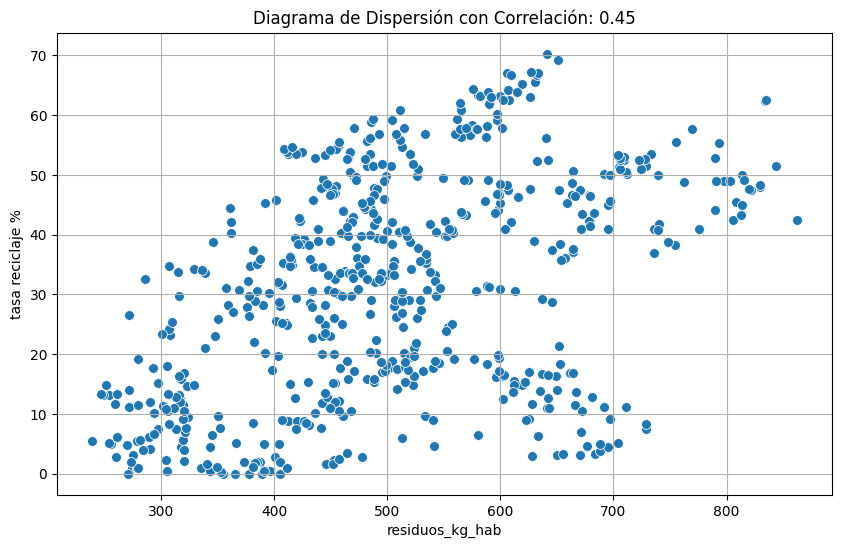

In [63]:
# Hacer gráfico de dispersión
import sys
sys.path.insert(0, '../utils')

from bootcampviztools import grafico_dispersion_con_correlacion
grafico_dispersion_con_correlacion(df_eurostat_full, "residuos_kg_hab", "tasa reciclaje %",50, mostrar_correlacion = True)

Se va a evaluar con el coeficiente de Pearson la correlación. Un coeficiente de Pearson de 1 indica una correlación lineal perfecta y positiva entre dos variables. Esto significa que a medida que una variable aumenta, la otra variable también aumenta en la misma proporción. En otras palabras, cuando el coeficiente de Pearson es 1, los puntos de datos se alinean perfectamente en una línea recta ascendente en un gráfico de dispersión.

Por otro lado, un coeficiente de Pearson de 0.45 indica una correlación positiva moderada entre dos variables. Esto sugiere que hay una relación positiva entre las variables, pero no es tan fuerte como una correlación de 1. En un gráfico de dispersión, los puntos de datos tienden a agruparse en una dirección ascendente, pero puede haber más dispersión alrededor de la línea de tendencia. Similar resultado estudiando los años 2018-2021 pero vemos que ha caído hasta 0,36 la correlación.

In [65]:
# Pearson
df_eurostat_full[["residuos_kg_hab", "tasa reciclaje %"]].corr()

from scipy.stats import pearsonr

pearsonr(df_eurostat_full["residuos_kg_hab"], df_eurostat_full["tasa reciclaje %"], alternative= "less")

PearsonRResult(statistic=0.45388675998538547, pvalue=1.0)

In [66]:
df_eurostat_full[["residuos_kg_hab", "tasa reciclaje %"]].corr()
pearsonr(df_eurostat_full_1821["residuos_kg_hab"], df_eurostat_full_1821["tasa reciclaje %"], alternative= "less")


PearsonRResult(statistic=0.3375307920231848, pvalue=0.9998230967487487)

Este estudio de correlación se va a hacer por grupos de países, primero por los grupos de países en función de zona geográfica.

Para todo el período del estudio, 2000-2021

Grupo: West


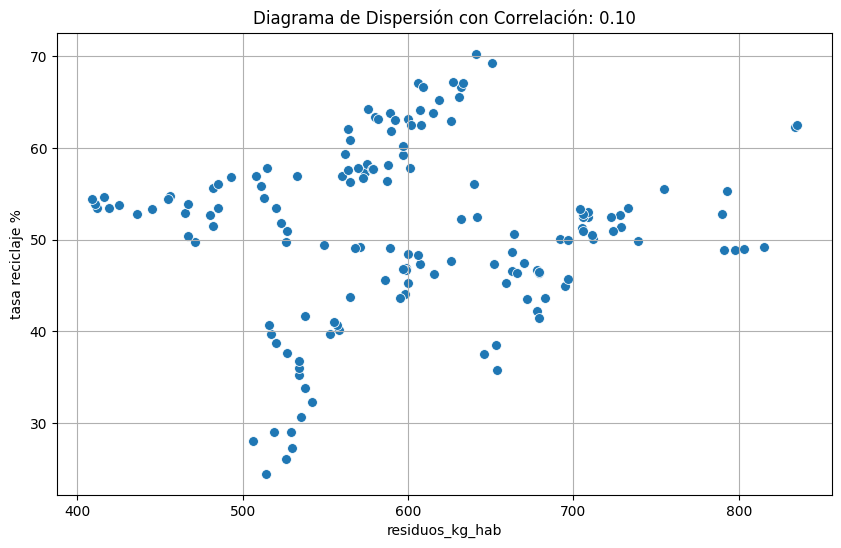

Grupo: East


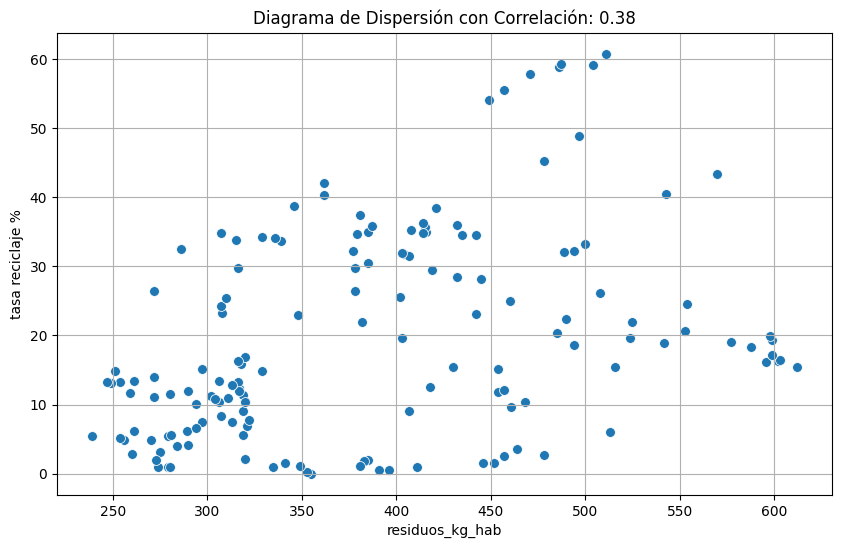

Grupo: South


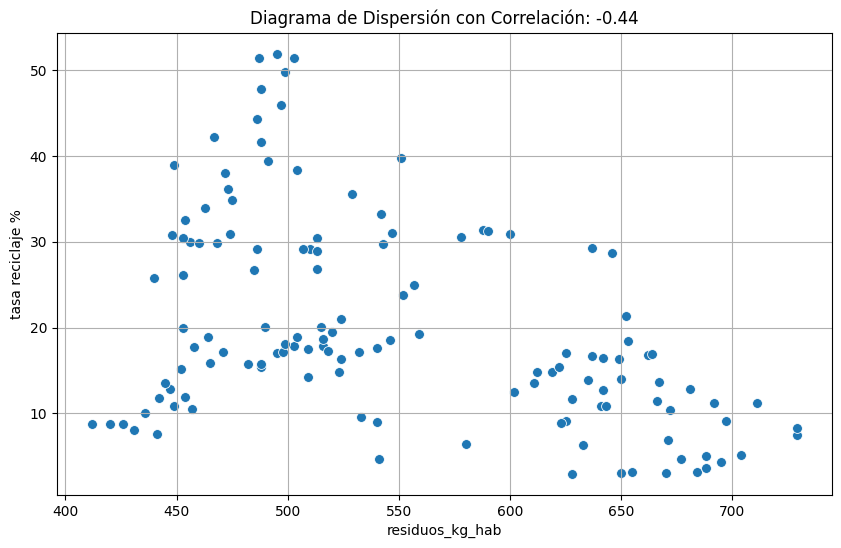

Grupo: North


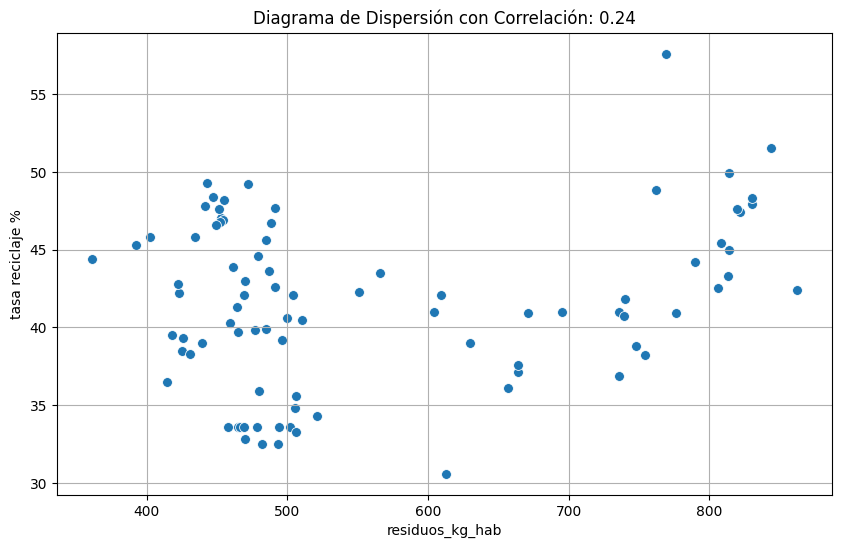

Grupo: Baltic


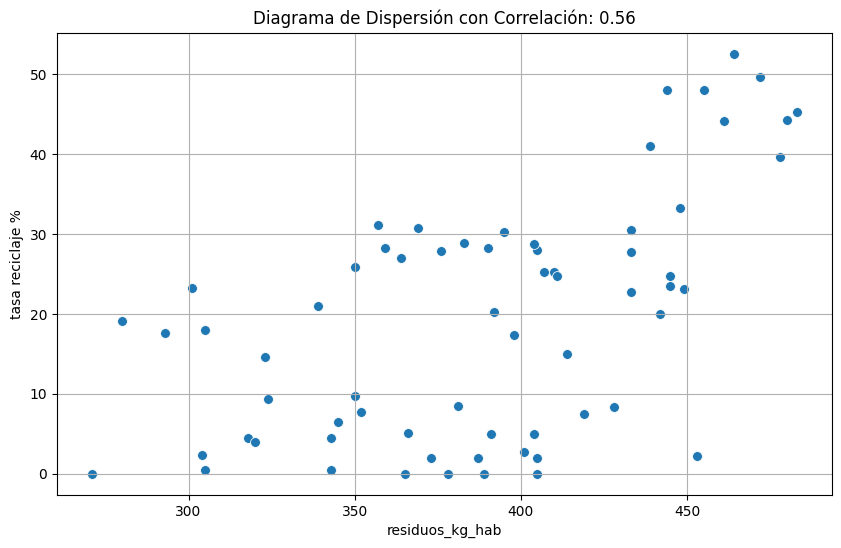

In [67]:
import sys
sys.path.insert(0, '../utils')
from bootcampviztools import grafico_dispersion_con_correlacion

# Iterar sobre cada valor único en la columna "group"
for group_value in df_eurostat_full['group'].unique():
    # Filtrar el DataFrame para el valor de "group" actual
    df_group = df_eurostat_full[df_eurostat_full['group'] == group_value]
    
    # Imprimir el nombre del grupo como parte del título del gráfico
    print("Grupo:", group_value)
    
    # Crear el gráfico de dispersión con correlación para la columna "residuos_kg_hab" y "tasa reciclaje %"
    grafico_dispersion_con_correlacion(df_group, "residuos_kg_hab", "tasa reciclaje %", 50, mostrar_correlacion=True)

Veamos el coeficiente por grupo numéricamente.

Para el período 2000-2021: 
- Baltic: El coeficiente de correlación de Pearson indica una correlación positiva moderada entre las variables en este grupo. El valor p asociado es extremadamente pequeño lo que sugiere que esta correlación es estadísticamente significativa a un nivel de confianza muy alto.

- East: El coeficiente de correlación de Pearson indica una correlación positiva más débil que en el grupo Baltic. Sin embargo, el valor p asociado sigue siendo muy pequeño , lo que indica que esta correlación también es estadísticamente significativa.

- North: El coeficiente de correlación de Pearson sugiere una correlación positiva más débil en comparación con los grupos anteriores. El valor p asociado indica que la correlación es significativa pero menos fuerte que en los grupos anteriores.

- South: El coeficiente de correlación de Pearson indica una correlación negativa moderada entre las variables en este grupo. El valor p asociado es extremadamente pequeño lo que sugiere que esta correlación es estadísticamente significativa a un nivel de confianza muy alto. Los países que lideran la correlación negativa son Spain, Cyprus e Italy.

- West: El coeficiente de correlación de Pearson sugiere una correlación positiva muy débil o casi nula en este grupo. El valor p asociado indica que esta correlación no es estadísticamente significativa a un nivel de confianza convencional. Podría deberse a un grupo de países muy heterogéneo.

En resumen, los grupos Baltic y East muestran correlaciones positivas significativas entre las variables, mientras que los grupos North y West muestran correlaciones más débiles y menos significativas. El grupo South muestra una correlación negativa significativa entre las variables.

In [69]:
# Definir una función para calcular el coeficiente de correlación de Pearson y p-valor para cada grupo
def calcular_pearson_por_grupo(df):
    # Calcular el coeficiente de correlación de Pearson y p-valor
    coef_pearson, p_valor = pearsonr(df["residuos_kg_hab"], df["tasa reciclaje %"])
    return coef_pearson, p_valor

# Calcular el coeficiente de correlación de Pearson para cada grupo
resultados_pearson_por_grupo = df_eurostat_full.groupby("group").apply(calcular_pearson_por_grupo)

# Mostrar los resultados
resultados_pearson_por_grupo

C:\Users\mfm-8\AppData\Local\Temp\ipykernel_492\1053208601.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_pearson_por_grupo = df_eurostat_full.groupby("group").apply(calcular_pearson_por_grupo)


group
Baltic        (0.563978060982954, 8.173330295468795e-07)
East        (0.3798263997733506, 1.1830690407767958e-06)
North        (0.23574308724022044, 0.027938978331390845)
South     (-0.43862667795102844, 1.4360257311370063e-07)
West          (0.10262911709703858, 0.20531101016713088)
dtype: object

Revisamos cada grupo de países

In [72]:
# Definir una función para calcular el coeficiente de correlación de Pearson y p-valor para cada país en el grupo 
def calcular_pearson_por_pais(df):
    # Calcular el coeficiente de correlación de Pearson y p-valor
    coef_pearson, p_valor = pearsonr(df["residuos_kg_hab"], df["tasa reciclaje %"])
    return coef_pearson, p_valor

**A modo de ejemplo veríamos el detalle dentro de un grupo por país, está en la versión extensa de esta Memoria**

In [114]:
# Filtrar el DataFrame para el grupo ""
df_group = df_eurostat_full[df_eurostat_full["group"] == "South"]

# Calcular el coeficiente de correlación de Pearson para cada país en el grupo 
resultados_pearson_por_pais = df_group.groupby("country").apply(calcular_pearson_por_pais)

# Mostrar los resultados
print("2000-2021 Grupo South")
print(resultados_pearson_por_pais)

# Filtrar el DataFrame para el grupo 
df_group18 = df_eurostat_full_1821[df_eurostat_full_1821["group"] == "South"]

# Calcular el coeficiente de correlación de Pearson para cada país en el grupo 
resultados_pearson_por_pais18 = df_group18.groupby("country").apply(calcular_pearson_por_pais)

# Mostrar los resultados
print("")
print("2000-2018 Grupo South")
print(resultados_pearson_por_pais18)


2000-2021 Grupo South
country
Cyprus       (-0.39040650380780334, 0.07243998182666778)
Greece       (0.8190701697103968, 3.140765903583688e-06)
Italy       (-0.7099073038437055, 0.0002148458958659363)
Malta         (0.011316392876509661, 0.9601370145448068)
Portugal        (0.3770240967880974, 0.0836895683317668)
Spain        (-0.5866878189333233, 0.004104029485896578)
dtype: object

2000-2018 Grupo South
country
Cyprus      (-0.038077067995879385, 0.9619229320041207)
Greece        (0.8413385770833007, 0.15866142291669938)
Italy        (-0.28287292479556203, 0.7171270752044379)
Malta       (-0.9647329394759866, 0.035267060524013516)
Portugal      (-0.1342312110428056, 0.8657687889571943)
Spain         (-0.3708371061234239, 0.6291628938765761)
dtype: object


C:\Users\mfm-8\AppData\Local\Temp\ipykernel_13680\2653528016.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_pearson_por_pais = df_group.groupby("country").apply(calcular_pearson_por_pais)
C:\Users\mfm-8\AppData\Local\Temp\ipykernel_13680\2653528016.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_pearson_por_pais18 = df_group18.groupby("country").apply(calcular_pearson_por_pai

A modo de resumen se genera una tabla por país con su correlación y sus datos.

In [77]:
# Función para calcular el coeficiente de correlación de Pearson y p-valor para cada país
def calcular_pearson_por_pais(df):
    # Calcular el coeficiente de correlación de Pearson y p-valor
    coef_pearson, p_valor = pearsonr(df["residuos_kg_hab"], df["tasa reciclaje %"])
    # Obtener la tasa de reciclaje promedio por país
    tasa_reciclaje = df["tasa reciclaje %"].mean()
    # Obtener la tasa de reciclaje promedio por país
    residuos_habitante = df["residuos_kg_hab"].mean()
    # Obtener la tasa de reciclaje promedio por país
    PIB_habitante = df["PIB per capita"].mean()
    # Crear una Serie con los resultados
    resultados = pd.Series({"Pearson": coef_pearson, "p-valor": p_valor, "Tasa de reciclaje (%)": tasa_reciclaje, "Residuos kg habitante": residuos_habitante,"PIB habitante":PIB_habitante})
    return resultados

# Calcular el coeficiente de correlación de Pearson para cada país en el DataFrame completo
resultados_pearson_por_pais = df_eurostat_full.groupby("country").apply(calcular_pearson_por_pais)

# Mostrar los resultados
resultados_pearson_por_pais

# Especificar la ruta del archivo Excel
excel_file_path = "../resultados/correlacion_reciclaje_residuo_pais.xlsx"

# Guardar el DataFrame en un archivo Excel
resultados_pearson_por_pais.to_excel(excel_file_path, index=False)

# Imprimir comprobación guardado
print("Guardado")

C:\Users\mfm-8\AppData\Local\Temp\ipykernel_492\3395015014.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_pearson_por_pais = df_eurostat_full.groupby("country").apply(calcular_pearson_por_pais)


Guardado


Evaluamos la correlación por grupo de datos según percentil, la correlación es mayor cuantos menos residuos se generan, es decir, si se generan más residuos se recicla más en países que generan una cantidad inferior a la mediana. Sin embargo, en países de más volumen de residuos, la correlación se vuelve negativa o positiva débil. No se recicla más por generar más residuos.

In [78]:
# Definir una función para calcular el coeficiente de correlación de Pearson y p-valor para cada grupo
def calcular_pearson_por_grupo(df):
    # Calcular el coeficiente de correlación de Pearson y p-valor
    coef_pearson, p_valor = pearsonr(df["residuos_kg_hab"], df["tasa reciclaje %"])
    return coef_pearson, p_valor

# Calcular el coeficiente de correlación de Pearson para cada grupo
resultados_pearson_por_grupo = df_eurostat_full.groupby("Grupo residuos/hab").apply(calcular_pearson_por_grupo)

# Mostrar los resultados
print("Resultados 2000-2021")
print(resultados_pearson_por_grupo)

# Calcular el coeficiente de correlación de Pearson para cada grupo
resultados_pearson_por_grupo18 = df_eurostat_full_1821.groupby("Grupo residuos/hab").apply(calcular_pearson_por_grupo)

# Mostrar los resultados
print("Resultados 2018-2021")
print(resultados_pearson_por_grupo18)


Resultados 2000-2021
Grupo residuos/hab
Grupo 1 perc.0-0.25        (0.4414483245641298, 1.000008035604302e-08)
Grupo 2 perc.0.25-0.50    (0.22294275420441143, 0.0054497468276775325)
Grupo 3 perc.0.50-0.75     (-0.11867132081104374, 0.17533599917712767)
Grupo 4 perc.0.75-1         (0.009453980442114589, 0.9076661165590633)
dtype: object
Resultados 2018-2021
Grupo residuos/hab
Grupo 1 perc.0-0.25       (0.7337266188014614, 8.877391619300056e-06)
Grupo 2 perc.0.25-0.50     (0.019863000105431846, 0.9200880612722868)
Grupo 3 perc.0.50-0.75      (0.06000891678671559, 0.7805982710872773)
Grupo 4 perc.0.75-1        (0.24193083588473596, 0.21485053542187144)
dtype: object


C:\Users\mfm-8\AppData\Local\Temp\ipykernel_492\2197443657.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_pearson_por_grupo = df_eurostat_full.groupby("Grupo residuos/hab").apply(calcular_pearson_por_grupo)
C:\Users\mfm-8\AppData\Local\Temp\ipykernel_492\2197443657.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_pearson_por_grupo18 = df_eurostat_full_1821.groupby("Grupo resid

Llama la atención la evolución del percentil 4 a correlación 0.24, se analiza por país. Son Austria y Alemania, países con alta correlación positiva y los líderes el tasa de reciclado a pesar de estar en el grupo 4 de generadores de residuos.

In [79]:
# Filtrar el DataFrame para incluir solo el grupo "4.PERC"
df_grupo_4_perc = df_eurostat_full_1821[df_eurostat_full_1821["Grupo residuos/hab"] == "Grupo 4 perc.0.75-1"]

# Calcular el coeficiente de correlación de Pearson para cada país dentro del grupo "4.PERC"
resultados_pearson_grupo_4_perc = df_grupo_4_perc.groupby("country").apply(calcular_pearson_por_pais)

# Mostrar los resultados
print("Resultados de correlación por país dentro del grupo 4.PERC:")
resultados_pearson_grupo_4_perc



C:\Users\mfm-8\AppData\Local\Temp\ipykernel_492\2841142434.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_pearson_grupo_4_perc = df_grupo_4_perc.groupby("country").apply(calcular_pearson_por_pais)


Resultados de correlación por país dentro del grupo 4.PERC:


Pearson   p-valor  Tasa de reciclaje (%)  Residuos kg habitante  \
country                                                                         
Austria      0.998130  0.001870                 60.175                 709.00   
Cyprus      -0.038077  0.961923                 16.175                 650.25   
Denmark     -0.584934  0.415066                 51.000                 810.25   
Germany      0.902255  0.097745                 68.350                 626.75   
Luxembourg  -0.424932  0.575068                 51.500                 794.25   
Malta       -0.964733  0.035267                 11.000                 655.75   
Switzerland -0.240146  0.759854                 52.900                 706.25   

             PIB habitante  
country                     
Austria            36972.5  
Cyprus             25220.0  
Denmark            48960.0  
Germany            35445.0  
Luxembourg         84007.5  
Malta              22480.0  
Switzerland        61695.0

    2.2.2.  Correlación residuos generados y de tasa de reciclaje con valor añadido ambiental respecto al PIB %


In [80]:
# Filtrar el DataFrame para incluir solo las filas donde la columna "Valor añadido ambiental respecto al PIB %" no sea NaN
df_eurostat_11_21_filtrado = df_eurostat_full[df_eurostat_full["Valor añadido ambiental respecto al PIB %"].notna()]

Escasa correlación entre la generación de residuos por habitante y el valor ambiental añadido al PIB

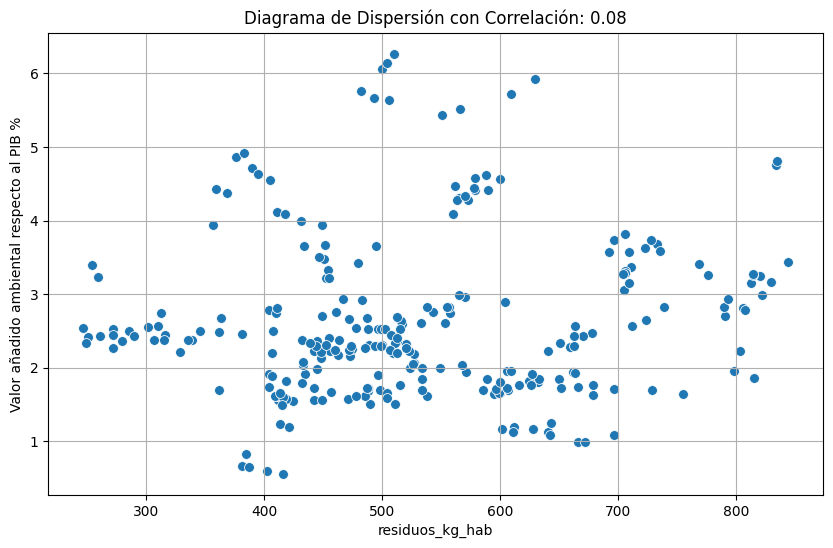

PearsonRResult(statistic=0.08170144601515399, pvalue=0.9079863790883128)

In [81]:
grafico_dispersion_con_correlacion(df_eurostat_11_21_filtrado, "residuos_kg_hab", "Valor añadido ambiental respecto al PIB %",50, mostrar_correlacion = True)

df_eurostat_11_21_filtrado[["residuos_kg_hab", "Valor añadido ambiental respecto al PIB %"]].corr()

from scipy.stats import pearsonr

pearsonr(df_eurostat_11_21_filtrado["residuos_kg_hab"], df_eurostat_11_21_filtrado["Valor añadido ambiental respecto al PIB %"], alternative= "less")

La correlación es baja en el grupo Oeste, 0.25 lo que impulsa a la baja el dato de correlación total, sin embargo, en los países del grupo South es de 0,73 y significativa, los países que menos residuos tienen generan mayor valor añadido ambiental respecto a su PIB. Al ser en datos absolutos un indicador

In [82]:
# Definir una función para calcular el coeficiente de correlación de Pearson y p-valor para cada grupo
def calcular_pearson_por_grupo(df):
    # Calcular el coeficiente de correlación de Pearson y p-valor
    coef_pearson, p_valor = pearsonr(df["residuos_kg_hab"], df[ "Valor añadido ambiental respecto al PIB %"])
    return coef_pearson, p_valor

# Calcular el coeficiente de correlación de Pearson para cada grupo
resultados_pearson_por_grupo = df_eurostat_11_21_filtrado.groupby("group").apply(calcular_pearson_por_grupo)

# Mostrar los resultados
resultados_pearson_por_grupo

C:\Users\mfm-8\AppData\Local\Temp\ipykernel_492\1795439354.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_pearson_por_grupo = df_eurostat_11_21_filtrado.groupby("group").apply(calcular_pearson_por_grupo)


group
Baltic     (-0.5831631619900047, 0.0011260437112787527)
East       (-0.34562326290210843, 0.006835102710819578)
North       (-0.4369945901645029, 0.010995410783290568)
South     (-0.7315301951165724, 1.6948428171961375e-08)
West         (0.2510649375701497, 0.011326339488084114)
dtype: object

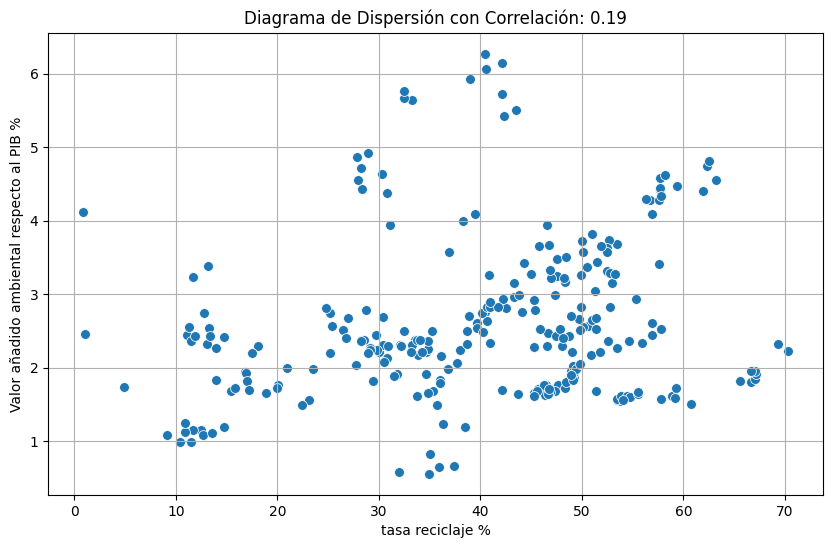

PearsonRResult(statistic=0.19426844096082357, pvalue=0.9992734442681862)

In [85]:
grafico_dispersion_con_correlacion(df_eurostat_11_21_filtrado, "tasa reciclaje %", "Valor añadido ambiental respecto al PIB %",50, mostrar_correlacion = True)
df_eurostat_11_21_filtrado[[ "tasa reciclaje %", "Valor añadido ambiental respecto al PIB %"]].corr()
pearsonr(df_eurostat_11_21_filtrado[ "tasa reciclaje %"], df_eurostat_11_21_filtrado["Valor añadido ambiental respecto al PIB %"], alternative= "less")

In [86]:
# Definir una función para calcular el coeficiente de correlación de Pearson y p-valor para cada grupo
def calcular_pearson_por_grupo(df):
    # Calcular el coeficiente de correlación de Pearson y p-valor
    coef_pearson, p_valor = pearsonr(df["tasa reciclaje %"], df[ "Valor añadido ambiental respecto al PIB %"])
    return coef_pearson, p_valor

# Calcular el coeficiente de correlación de Pearson para cada grupo
resultados_pearson_por_grupo = df_eurostat_11_21_filtrado.groupby("group").apply(calcular_pearson_por_grupo)

# Mostrar los resultados
resultados_pearson_por_grupo

C:\Users\mfm-8\AppData\Local\Temp\ipykernel_492\2002527061.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_pearson_por_grupo = df_eurostat_11_21_filtrado.groupby("group").apply(calcular_pearson_por_grupo)


group
Baltic       (-0.04077454391859491, 0.8367853866480471)
East       (-0.516107428158844, 2.4344705446587176e-05)
North     (-0.5856311650986198, 0.00034301682261338894)
South          (0.86221033527962, 5.53254072728223e-14)
West       (0.33054269838567274, 0.0007355283105356571)
dtype: object

**A continuación se profundiza dentro de cada grupo para ver por país, a modo de ejemplo se deja el código y resultado de un grupo de países.**

Se evalúa South como valor más discrepante para ver correlaciones por país 

In [87]:
# Definir una función para calcular el coeficiente de correlación de Pearson y p-valor para cada país dentro del grupo "South"
def calcular_pearson_por_pais(df):
    # Calcular el coeficiente de correlación de Pearson y p-valor
    coef_pearson, p_valor = pearsonr(df["tasa reciclaje %"], df["Valor añadido ambiental respecto al PIB %"])
    return coef_pearson, p_valor

# Filtrar el DataFrame para incluir solo el grupo "South"
df_grupo_s = df_eurostat_11_21_filtrado[df_eurostat_11_21_filtrado["group"] == "South"]

# Calcular el coeficiente de correlación de Pearson para cada país dentro del grupo "South"
resultados_pearson_grupo_s = df_grupo_s.groupby("country").apply(calcular_pearson_por_pais)

# Mostrar los resultados
resultados_pearson_grupo_s

C:\Users\mfm-8\AppData\Local\Temp\ipykernel_492\2180107402.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_pearson_grupo_s = df_grupo_s.groupby("country").apply(calcular_pearson_por_pais)


country
Cyprus         (0.4165102249995801, 0.58348977500042)
Greece      (0.22828125806899793, 0.5866104988609048)
Italy       (0.5039626636015363, 0.30805381158765016)
Malta       (0.3349862376823064, 0.34405879158852326)
Portugal    (0.13205243692181562, 0.7552650104973753)
Spain       (0.796665950020401, 0.017942221740330284)
dtype: object

    2.2.3.  Correlación residuos generados y de tasa de reciclaje con PIB  per capita


Hay fuerte correlación entre la tasa de reciclaje y PIB per capita

Para todo el período, 2000-2021

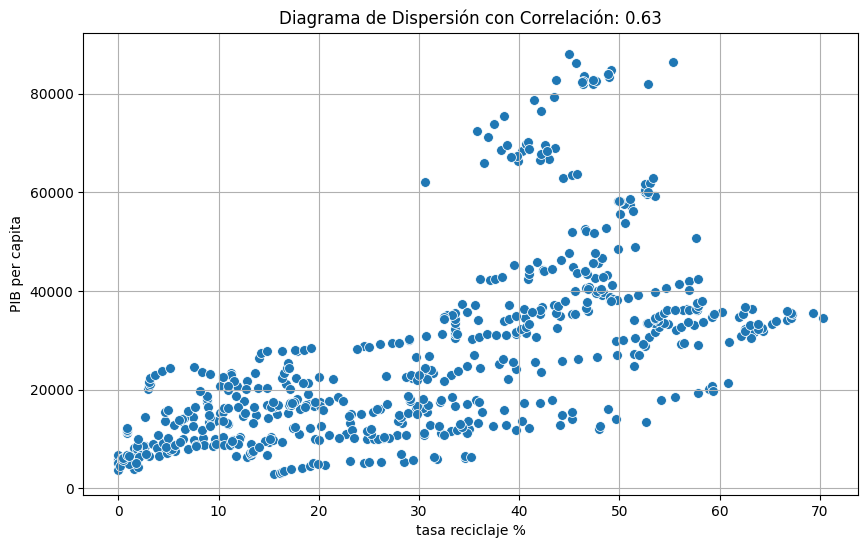

Coeficiente de correlación de Pearson: 0.6265280114382497
P-valor: 5.596702437504045e-66


In [88]:
# Grafico o de dispersión con correlación
grafico_dispersion_con_correlacion(df_eurostat_full, "tasa reciclaje %", "PIB per capita", 50, mostrar_correlacion=True)

# Calcular el coeficiente de correlación de Pearson utilizando el método corr() de Pandas
correlacion_pearson = df_eurostat_full[["tasa reciclaje %", "PIB per capita"]].corr()

# Calcular el coeficiente de correlación de Pearson y el p-valor utilizando scipy.stats
coef_pearson, p_valor = pearsonr(df_eurostat_full["tasa reciclaje %"], df_eurostat_full["PIB per capita"])
print("Coeficiente de correlación de Pearson:", coef_pearson)
print("P-valor:", p_valor)

Viéndolo por grupo de países, la correlación es positiva y alta en países de grupo Baltic, East o South. Si lo reducimos al período 2018-2021 desciende por la correlación negativa que pasan a tener Baltic junto a North.

In [91]:
# Definir una función para calcular el coeficiente de correlación de Pearson y p-valor para cada grupo
def calcular_pearson_por_grupo(df):
    # Calcular el coeficiente de correlación de Pearson y p-valor
    coef_pearson, p_valor = pearsonr(df["tasa reciclaje %"], df[ "PIB per capita"])
    return coef_pearson, p_valor

# Calcular el coeficiente de correlación de Pearson para cada grupo
resultados_pearson_por_grupob = df_eurostat_full.groupby("group").apply(calcular_pearson_por_grupo)

# Mostrar los resultados
print("Resultado 2000-2021")
print(resultados_pearson_por_grupob)

# Calcular el coeficiente de correlación de Pearson para cada grupo
resultados_pearson_por_grupo18b = df_eurostat_full.groupby("group").apply(calcular_pearson_por_grupo)


# Calcular el coeficiente de correlación de Pearson para cada grupo
resultados_pearson_por_grupo18b = df_eurostat_full_1821.groupby("group").apply(calcular_pearson_por_grupo)
# Mostrar los resultados
print("Resultado 2018-2021")
print(resultados_pearson_por_grupo18b)


C:\Users\mfm-8\AppData\Local\Temp\ipykernel_492\2784717343.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_pearson_por_grupob = df_eurostat_full.groupby("group").apply(calcular_pearson_por_grupo)


Resultado 2000-2021
group
Baltic     (0.8203284286487541, 3.533088554325149e-17)
East      (0.5337404856440499, 1.0209569009915314e-12)
North        (0.1333031980876014, 0.21836489357047087)
South       (0.44771272168259646, 7.3442821341727e-08)
West       (-0.16554792962598194, 0.04018542116928453)
dtype: object
Resultado 2018-2021
group
Baltic      (-0.2901945161442173, 0.3601991658987384)
East      (0.7415550445426012, 6.326604080323098e-06)
North       (-0.1801549141738826, 0.5043501024784467)
South       (0.3929091773388588, 0.05752594040973523)
West       (-0.17684078862701336, 0.3680061414413913)
dtype: object


C:\Users\mfm-8\AppData\Local\Temp\ipykernel_492\2784717343.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_pearson_por_grupo18b = df_eurostat_full.groupby("group").apply(calcular_pearson_por_grupo)
C:\Users\mfm-8\AppData\Local\Temp\ipykernel_492\2784717343.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_pearson_por_grupo18b = df_eurostat_full_1821.groupby("group").apply(calcu

Revisando la generación de residuos con el PIB per capita, hay una correlación prácticamente idéntica a la de tasa de reciclaje. Incluso en el período 2018-2021, en vez de disminuir como en el caso de la tasa de reciclaje, aumenta la correlación

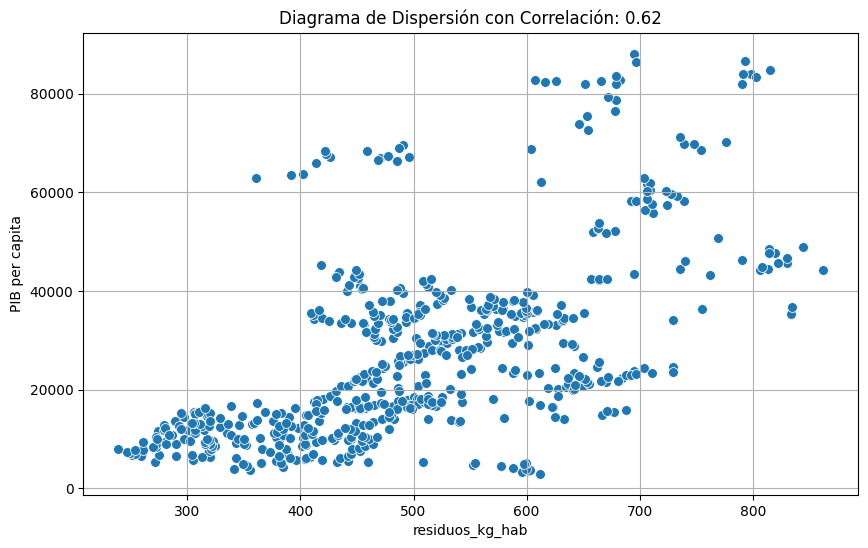

Coeficiente de correlación de Pearson: 0.6176507928533069
P-valor: 1.1654093936581297e-63


In [92]:
# Grafico de dispersión con correlación
grafico_dispersion_con_correlacion(df_eurostat_full, "residuos_kg_hab", "PIB per capita", 50, mostrar_correlacion=True)

# Calcular el coeficiente de correlación de Pearson utilizando el método corr() de Pandas
correlacion_pearson = df_eurostat_full[["residuos_kg_hab", "PIB per capita"]].corr()

# Calcular el coeficiente de correlación de Pearson y el p-valor utilizando scipy.stats
coef_pearson, p_valor = pearsonr(df_eurostat_full["residuos_kg_hab"], df_eurostat_full["PIB per capita"])
print("Coeficiente de correlación de Pearson:", coef_pearson)
print("P-valor:", p_valor)

Por zonas, la correlación entre residuos y PIB es positiva y fuerte sobre todo en los países del Oest y Bálticos.

In [132]:
# Definir una función para calcular el coeficiente de correlación de Pearson y p-valor para cada grupo
def calcular_pearson_por_grupo(df):
    # Calcular el coeficiente de correlación de Pearson y p-valor
    coef_pearson, p_valor = pearsonr(df["residuos_kg_hab"], df[ "PIB per capita"])
    return coef_pearson, p_valor

# Calcular el coeficiente de correlación de Pearson para cada grupo
resultados_pearson_por_grupo = df_eurostat_full.groupby("group").apply(calcular_pearson_por_grupo)

# Mostrar los resultados
resultados_pearson_por_grupo

C:\Users\mfm-8\AppData\Local\Temp\ipykernel_13680\1961223697.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_pearson_por_grupo = df_eurostat_full.groupby("group").apply(calcular_pearson_por_grupo)


group
Baltic    (0.3852516746577178, 0.0014018713486345883)
East        (0.06311469802595118, 0.4367887980432025)
North       (0.10145948572992959, 0.3497474772665189)
South       (0.1219406124159275, 0.16365923567366503)
West      (0.647946948056054, 1.0588925700382441e-19)
dtype: object

Veamos los boxplot por zonas para ver la amplitud de rango.

En residuos habitante no hay outliers identificados, aunque sí vemos como anteriormente, amplia variedad en el grupo North.

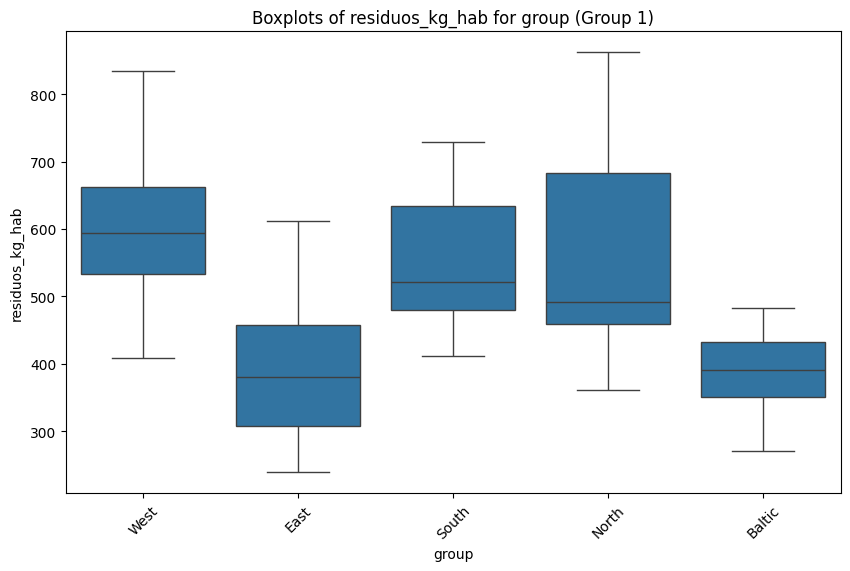

In [95]:
from bootcampviztools import plot_grouped_boxplots
plot_grouped_boxplots(df_eurostat_full, "group", "residuos_kg_hab")

En el caso de outliers de tasa de reciclaje los países del grupo West que están por debajo de 30% es Francia y del grupo North por encima de 50% es Dinamarca.

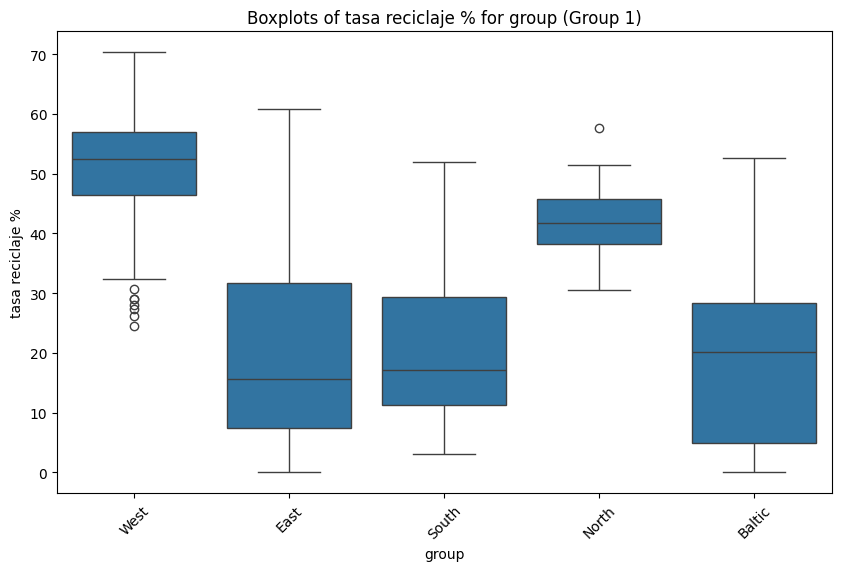

In [135]:
import sys
sys.path.insert(0, '../utils')
from bootcampviztools import plot_grouped_boxplots
plot_grouped_boxplots(df_eurostat_full, "group", "tasa reciclaje %")


Países del grupo West con tasa de reciclaje inferior al 30%:
['France']


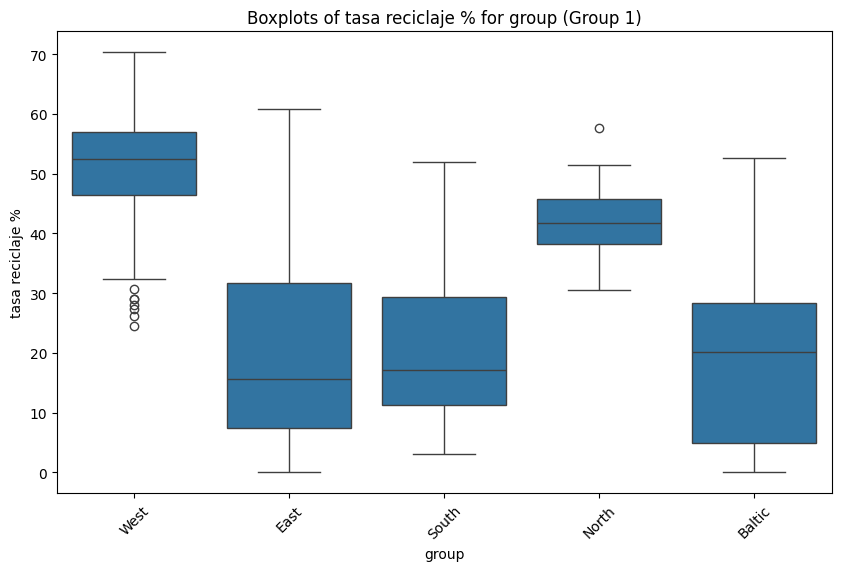

In [96]:
# Filtrar el DataFrame para incluir solo el grupo "West"
df_west = df_eurostat_full[df_eurostat_full["group"] == "West"]

# Identificar los países del grupo "West" con una tasa de reciclaje inferior al 30%
paises_reciclaje_bajo_west = df_west[df_west["tasa reciclaje %"] < 30]["country"].unique()

# Mostrar los países del grupo "West" con una tasa de reciclaje inferior al 30%
print("Países del grupo West con tasa de reciclaje inferior al 30%:")
print(paises_reciclaje_bajo_west)

# Visualizar los datos usando plot_grouped_boxplots
plot_grouped_boxplots(df_eurostat_full, "group", "tasa reciclaje %")


Países del grupo North con tasa de reciclaje superior al 50%:
['Denmark']


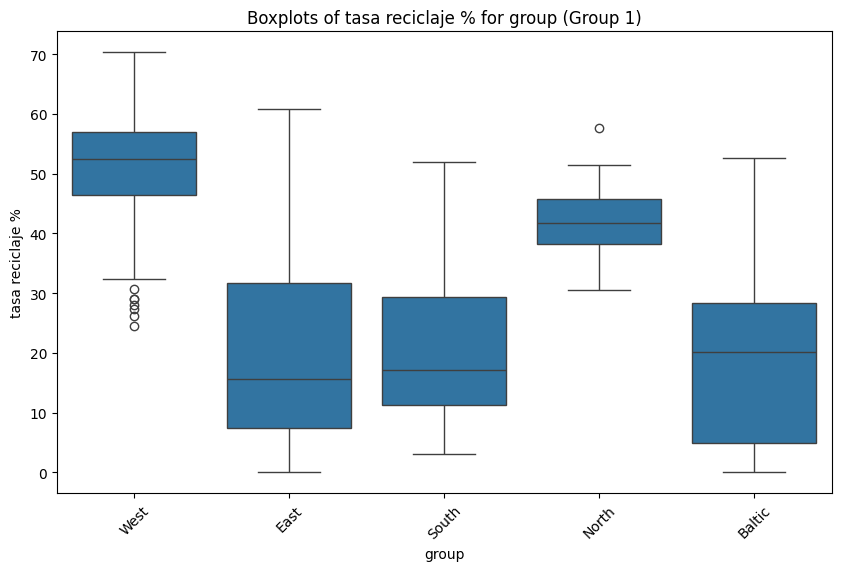

In [97]:
# Filtrar el DataFrame para incluir solo el grupo "North"
df_north = df_eurostat_full[df_eurostat_full["group"] == "North"]

# Identificar los países del grupo "North" con una tasa de reciclaje superior al 50%
paises_reciclaje_alto_north = df_north[df_north["tasa reciclaje %"] > 50]["country"].unique()

# Mostrar los países del grupo "North" con una tasa de reciclaje superior al 50%
print("Países del grupo North con tasa de reciclaje superior al 50%:")
print(paises_reciclaje_alto_north)

# Visualizar los datos usando plot_grouped_boxplots
plot_grouped_boxplots(df_eurostat_full, "group", "tasa reciclaje %")


En el caso de PIB per capita, vimos anteriormente que el outlier es Luxemburgo.

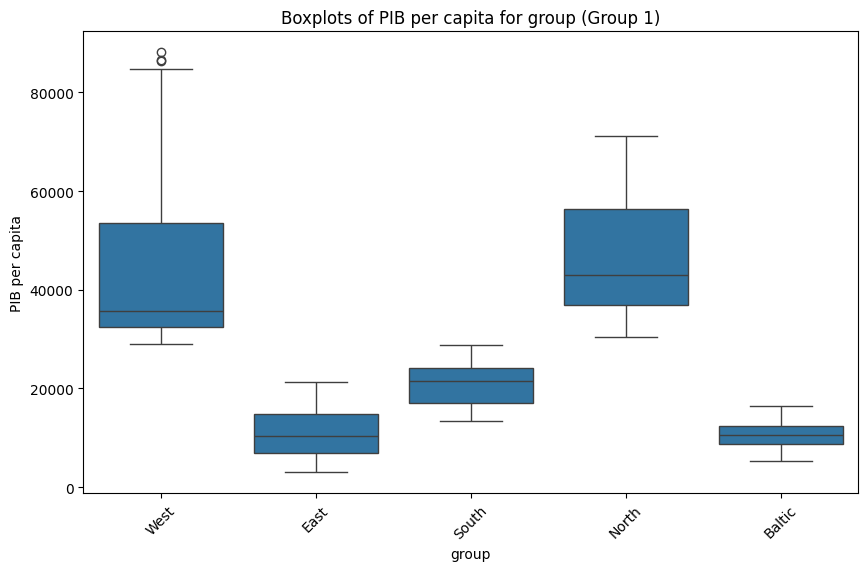

In [99]:
plot_grouped_boxplots(df_eurostat_full, "group", "PIB per capita")

In [100]:
# Filtrar el DataFrame para incluir solo el grupo "West"
df_west = df_eurostat_full[df_eurostat_full["group"] == "West"]

# Identificar los países con un PIB per cápita superior a 80000 en el grupo "West"
paises_pib_alto_west = df_west[df_west["PIB per capita"] > 80000]["country"].unique()

# Mostrar los países con un PIB per cápita superior a 80000 en el grupo "West"
print("Países con PIB per cápita superior a 90000 en el grupo West:")
print(paises_pib_alto_west)


Países con PIB per cápita superior a 90000 en el grupo West:
['Luxembourg']


En el caso de valor añadido ambiental, Rumania e Italia son outliers

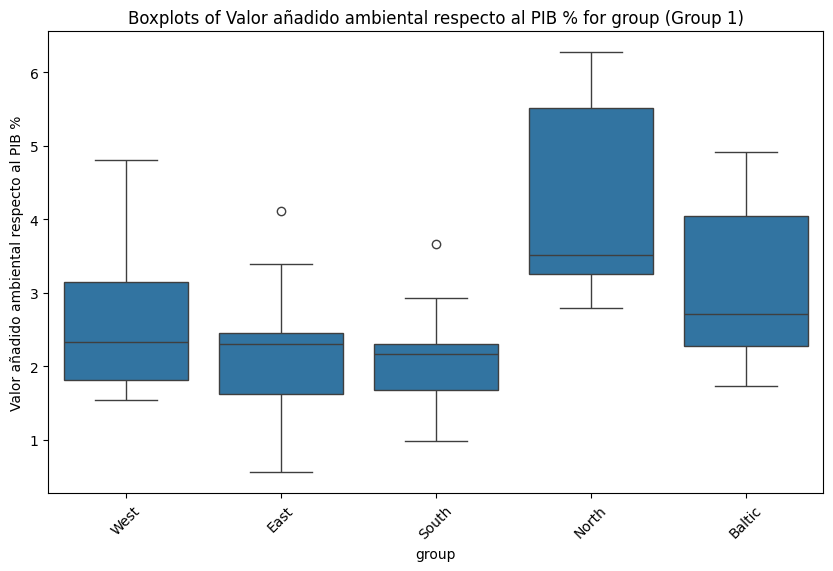

In [101]:
plot_grouped_boxplots(df_eurostat_11_21_filtrado, "group", "Valor añadido ambiental respecto al PIB %")

In [102]:
# Filtrar el DataFrame para incluir solo los grupos "East" y "South"
df_east_south = df_eurostat_11_21_filtrado[df_eurostat_11_21_filtrado["group"].isin(["East", "South"])]

# Identificar los países con un valor añadido ambiental superior al 3.5% en cada grupo
paises_valor_alto_east = df_east_south[df_east_south["group"] == "East"][df_east_south["Valor añadido ambiental respecto al PIB %"] > 3.5]["country"].unique()
paises_valor_alto_south = df_east_south[df_east_south["group"] == "South"][df_east_south["Valor añadido ambiental respecto al PIB %"] > 3.5]["country"].unique()

# Mostrar los países con valor añadido ambiental superior al 3.5% en cada grupo
print("Países con valor añadido ambiental superior al 3.5% en el grupo East:")
print(paises_valor_alto_east)

print("\nPaíses con valor añadido ambiental superior al 3.5% en el grupo South:")
print(paises_valor_alto_south)

Países con valor añadido ambiental superior al 3.5% en el grupo East:
['Romania']

Países con valor añadido ambiental superior al 3.5% en el grupo South:
['Italy']


C:\Users\mfm-8\AppData\Local\Temp\ipykernel_492\1207937191.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  paises_valor_alto_east = df_east_south[df_east_south["group"] == "East"][df_east_south["Valor añadido ambiental respecto al PIB %"] > 3.5]["country"].unique()
C:\Users\mfm-8\AppData\Local\Temp\ipykernel_492\1207937191.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  paises_valor_alto_south = df_east_south[df_east_south["group"] == "South"][df_east_south["Valor añadido ambiental respecto al PIB %"] > 3.5]["country"].unique()


Continuamos resumiento  la correlación más fuerte, tasa de reciclaje y PIB per capita junto a otros datos de interés.

Para el período 2000-2021

In [103]:
# Función para calcular el coeficiente de correlación de Pearson y p-valor para cada país
def calcular_pearson_por_pais(df):
    # Calcular el coeficiente de correlación de Pearson y p-valor
    coef_pearson, p_valor = pearsonr(df["PIB per capita"], df["tasa reciclaje %"])
    # Obtener la tasa de reciclaje promedio por país
    tasa_reciclaje = df["tasa reciclaje %"].mean()
    # Obtener la tasa de reciclaje promedio por país
    residuos_habitante = df["residuos_kg_hab"].mean()
    # Obtener la tasa de reciclaje promedio por país
    PIB_habitante = df["PIB per capita"].mean()
    # Crear una Serie con los resultados
    resultados = pd.Series({"Pearson": coef_pearson, "p-valor": p_valor, "Tasa de reciclaje (%)": tasa_reciclaje, "Residuos kg habitante": residuos_habitante,"PIB habitante":PIB_habitante})
    return resultados

# Calcular el coeficiente de correlación de Pearson para cada país en el DataFrame completo
resultados_pearson_por_paisPIB = df_eurostat_full.groupby("country").apply(calcular_pearson_por_pais)

# Mostrar los resultados
resultados_pearson_por_paisPIB


# Especificar la ruta del archivo Excel
excel_file_path = "../resultados/correlacion_PIBreciclaje_por_pais.xlsx"

# Guardar el DataFrame en un archivo Excel
resultados_pearson_por_paisPIB.to_excel(excel_file_path)

print(f"Los resultados se han guardado en el archivo: {excel_file_path}")

C:\Users\mfm-8\AppData\Local\Temp\ipykernel_492\202251244.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_pearson_por_paisPIB = df_eurostat_full.groupby("country").apply(calcular_pearson_por_pais)


Los resultados se han guardado en el archivo: ../resultados/correlacion_PIBreciclaje_por_pais.xlsx


### Test ANOVA


Aplicado para 2000-2021 en Residuos habitante por grupo

Realizandolo en residuos kg hab por group, el resultado del ANOVA sugiere que hay diferencias significativas en la cantidad de residuos por habitante entre al menos un par de grupos en tu conjunto de datos.  F es una medida de cuánto varían las medias de los grupos entre sí, en relación con la variación dentro de cada grupo. Un valor p muy pequeño indica que hay una baja probabilidad de que las diferencias observadas entre los grupos se deban al azar.

In [108]:
from scipy import stats

# Obtener los valores únicos de la columna categórica
grupos = df_eurostat_full['group'].unique() 
tasa_pais = [df_eurostat_full[df_eurostat_full['group'] == grupo]['residuos_kg_hab'] for grupo in grupos] 

f_val, p_val = stats.f_oneway(*tasa_pais) 
print("Valor F Residuos por grupo 2000-2021:", f_val)
print("Valor p Residuos por grupo 2000-2021:", p_val)

Valor F Residuos por grupo 2000-2021: 126.22106087321947
Valor p Residuos por grupo 2000-2021: 9.823817824794348e-78


**Para el período 2018-2021 sólo se aplica a modo de ejemplo en residuos habitante**

Aplicado para 2018-2021 en Residuos habitante por grupo, se reduce considerablemente el valor de F, siendo un dato con menor variaciónal del período extenso por la mejora en la tasa de reciclaje a lo largo de 20 años.

In [107]:
# Obtener los valores únicos de la columna categórica
grupos = df_eurostat_full['group'].unique() 
tasa_pais = [df_eurostat_full_1821[df_eurostat_full_1821['group'] == grupo]['residuos_kg_hab'] for grupo in grupos] 

f_val, p_val = stats.f_oneway(*tasa_pais) 
print("Valor F Residuos por grupo 2018-2021:", f_val)
print("Valor p Residuos por grupo 2018-2021:", p_val)

Valor F Residuos por grupo: 22.83335154543747
Valor p Residuos por grupo: 1.5936553062264177e-13


Aplicado para 2000-2021 en Tasa reciclaje % por grupo

Existe al menos una diferencia significativa entre los grupos en términos de la variable "tasa reciclaje %". El valor F es una medida de cuánto varían las medias de los grupos entre sí, en relación con la variación dentro de cada grupo. Un valor p muy pequeño indica que hay una baja probabilidad de que las diferencias observadas entre los grupos se deban al azar. 

In [109]:
# Obtener los valores únicos de la columna categórica
grupos = df_eurostat_full['group'].unique() 
tasa_pais = [df_eurostat_full[df_eurostat_full['group'] == grupo]["tasa reciclaje %"] for grupo in grupos] 

f_val, p_val = stats.f_oneway(*tasa_pais) 
print("Valor F Tasa reciclaje 2000-2021 por grupo:", f_val)
print("Valor p Tasa reciclaje 2000-2021 por grupo:", p_val)

Valor F Tasa reciclaje 2000-2021 por grupo: 206.18835549259634
Valor p Tasa reciclaje 2000-2021 por grupo: 2.0632401765366144e-110


Existe al menos una diferencia significativa entre los grupos en términos del "Valor añadido ambiental respecto al PIB %". Un valor F más alto sugiere una mayor variabilidad entre los grupos en comparación con la variabilidad dentro de los grupos. El valor p tan pequeño indica que hay una baja probabilidad de que las diferencias observadas entre los grupos se deban al azar. Por lo tanto, podemos interpretar que al menos un par de grupos tienen medias significativamente diferentes entre sí en cuanto al "Valor añadido ambiental respecto al PIB %". 

In [111]:
# Obtener los valores únicos de la columna categórica
grupos = df_eurostat_11_21_filtrado['group'].unique() 
tasa_pais = [df_eurostat_11_21_filtrado[df_eurostat_11_21_filtrado['group'] == grupo]["Valor añadido ambiental respecto al PIB %"] for grupo in grupos] 

f_val, p_val = stats.f_oneway(*tasa_pais) 
print("Valor F Valor añadido ambiental 2011-2021:", f_val)
print("Valor p Valor añadido ambiental 2011-2021:", p_val)

Valor F Valor añadido ambiental 2011-2021: 35.491001383137224
Valor p Valor añadido ambiental 2011-2021: 1.1381709265035931e-23


Aplicado para 2000-2021 en Residuos habitante por grupo

Existe al menos una diferencia significativa entre los grupos en términos del "PIB per capita". Un valor F más alto sugiere una mayor variabilidad entre los grupos en comparación con la variabilidad dentro de los grupos. El valor p tan pequeño indica que hay una baja probabilidad de que las diferencias observadas entre los grupos se deban al azar.Por lo tanto, podemos interpretar que al menos un par de grupos tienen medias significativamente diferentes entre sí en cuanto al "PIB per capita".

In [112]:
# Obtener los valores únicos de la columna categórica
grupos = df_eurostat_full['group'].unique() 
tasa_pais = [df_eurostat_full[df_eurostat_full['group'] == grupo]["PIB per capita"] for grupo in grupos] 

f_val, p_val = stats.f_oneway(*tasa_pais) 
print("Valor F PIB per capita 2000-2021:", f_val)
print("Valor p PIB per capita 2000-2021:", p_val)

Valor F PIB per capita 2000-2021: 308.45590076265677
Valor p PIB per capita 2000-2021: 8.116042158738005e-143


Aplicado para 2000-2021 en Residuos habitante por grupo

Existe al menos una diferencia significativa entre los grupos en términos de la tasa de reciclaje. Un valor F más bajo sugiere una menor variabilidad entre los grupos en comparación con la variabilidad dentro de los grupos. El valor p tan pequeño indica que hay una baja probabilidad de que las diferencias observadas entre los grupos se deban al azar.

In [115]:
# Obtener los valores únicos de la columna categórica
grupos = df_eurostat['TIME_PERIOD'].unique() 
tasa_pais = [df_eurostat[df_eurostat['TIME_PERIOD'] == grupo]["tasa reciclaje %"] for grupo in grupos] 

f_val, p_val = stats.f_oneway(*tasa_pais) 
print("Valor F time period tasa de reciclaje:", f_val)
print("Valor p time period tasa de reciclaje:", p_val)

Valor F time period tasa de reciclaje: 3.063425643777759
Valor p time period tasa de reciclaje: 3.574675528692005e-06


Revisión serie temporal

Seguimos revisando la serie temporal

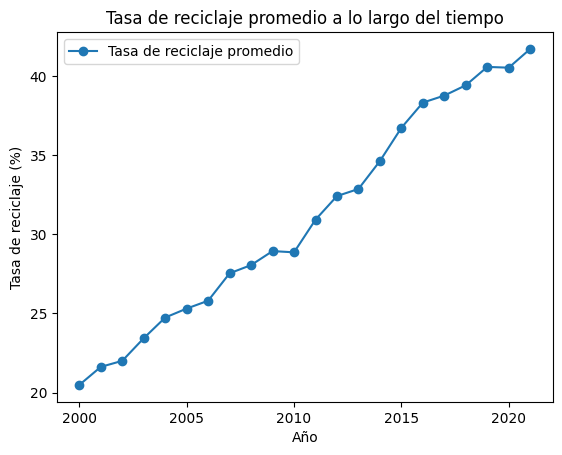

In [116]:
# Agrupar los datos por 'TIME_PERIOD' y calcular la media de 'tasa reciclaje %' para cada período de tiempo
grupo_tiempo = df_eurostat_full.groupby('TIME_PERIOD')['tasa reciclaje %'].mean()

# Trazar la serie temporal de la tasa de reciclaje promedio a lo largo del tiempo
plt.plot(grupo_tiempo.index, grupo_tiempo.values, marker='o', linestyle='-', label='Tasa de reciclaje promedio')

# Etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('Tasa de reciclaje (%)')
plt.title('Tasa de reciclaje promedio a lo largo del tiempo')
plt.legend()

# Mostrar el gráfico
plt.show()

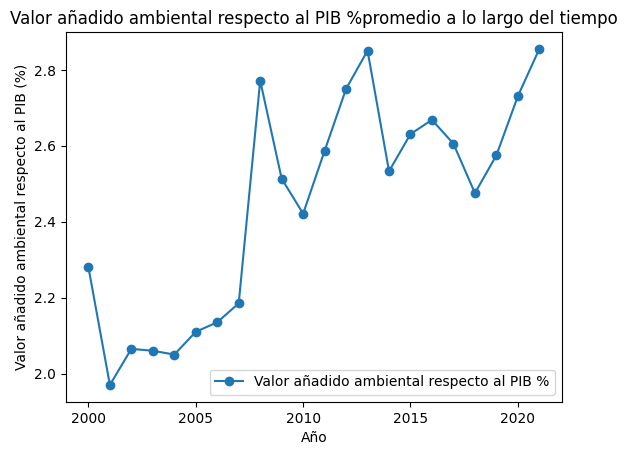

In [119]:
# Agrupar los datos por 'TIME_PERIOD' y calcular la media de 'tasa reciclaje %' para cada período de tiempo
grupo_tiempo = df_eurostat_full.groupby('TIME_PERIOD')['Valor añadido ambiental respecto al PIB %'].mean()

# Trazar la serie temporal de la tasa de reciclaje promedio a lo largo del tiempo
plt.plot(grupo_tiempo.index, grupo_tiempo.values, marker='o', linestyle='-', label='Valor añadido ambiental respecto al PIB %')

# Etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('Valor añadido ambiental respecto al PIB (%)')
plt.title('Valor añadido ambiental respecto al PIB %promedio a lo largo del tiempo')
plt.legend()

# Mostrar el gráfico
plt.show()

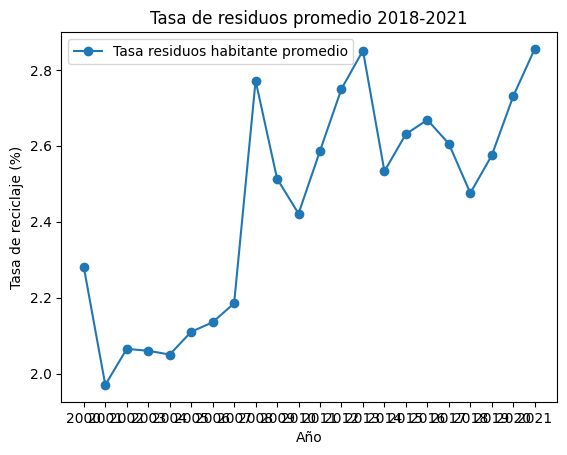

In [120]:
# Trazar la serie temporal a lo largo del tiempo
plt.plot(grupo_tiempo.index, grupo_tiempo.values, marker='o', linestyle='-', label='Tasa residuos habitante promedio')

# Etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('Tasa de reciclaje (%)')

plt.title('Tasa de residuos promedio 2018-2021')
plt.legend()

# Especificar el formato del eje x
plt.xticks(grupo_tiempo.index, [int(year) for year in grupo_tiempo.index])

# Mostrar el gráfico
plt.show()

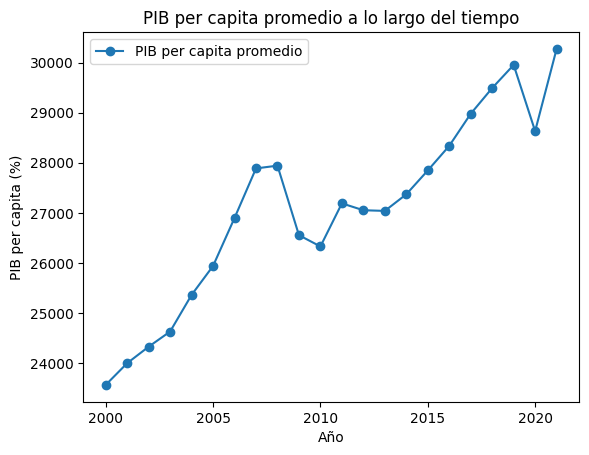

In [121]:
# Agrupar los datos por 'TIME_PERIOD' y calcular la media para cada período de tiempo
grupo_tiempo = df_eurostat_full.groupby('TIME_PERIOD')['PIB per capita'].mean()

# Trazar la serie temporal a lo largo del tiempo
plt.plot(grupo_tiempo.index, grupo_tiempo.values, marker='o', linestyle='-', label='PIB per capita promedio')

# Etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('PIB per capita (%)')
plt.title('PIB per capita promedio a lo largo del tiempo')
plt.legend()

# Mostrar el gráfico
plt.show()

La evolución de la serie temporal de tasa de reciclaje por grupo de países

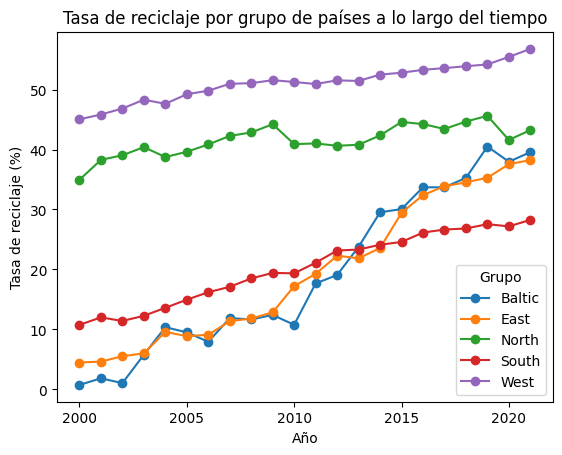

In [122]:
# Agrupar los datos por 'group' y 'TIME_PERIOD' y calcular la media de 'tasa reciclaje %' para cada grupo en cada período de tiempo
grupo_pais_tiempo = df_eurostat_full.groupby(['group', 'TIME_PERIOD'])['tasa reciclaje %'].mean().unstack(level=0)

# Trazar la serie temporal de la tasa de reciclaje promedio para cada grupo de países
grupo_pais_tiempo.plot(marker='o', linestyle='-')

# Etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('Tasa de reciclaje (%)')
plt.title('Tasa de reciclaje por grupo de países a lo largo del tiempo')
plt.legend(title='Grupo')

# Mostrar el gráfico
plt.show()

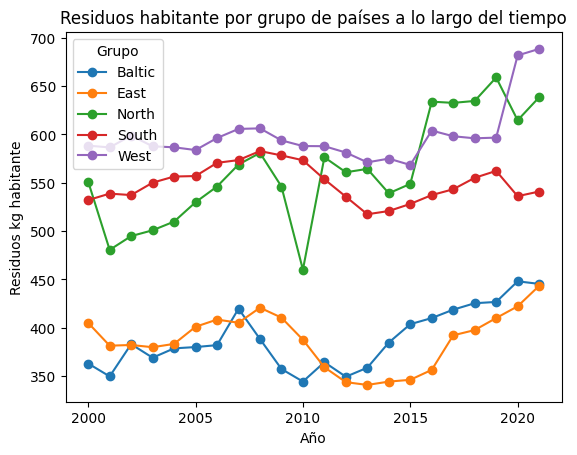

In [123]:
# Agrupar los datos por 'group' y 'TIME_PERIOD' y calcular la media de 'tasa reciclaje %' para cada grupo en cada período de tiempo
grupo_pais_tiempo = df_eurostat_full.groupby(['group', 'TIME_PERIOD'])['residuos_kg_hab'].mean().unstack(level=0)
# Trazar la serie temporal de la tasa de reciclaje promedio para cada grupo de países
grupo_pais_tiempo.plot(marker='o', linestyle='-')

# Etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('Residuos kg habitante')
plt.title('Residuos habitante por grupo de países a lo largo del tiempo')
plt.legend(title='Grupo')

# Mostrar el gráfico
plt.show()

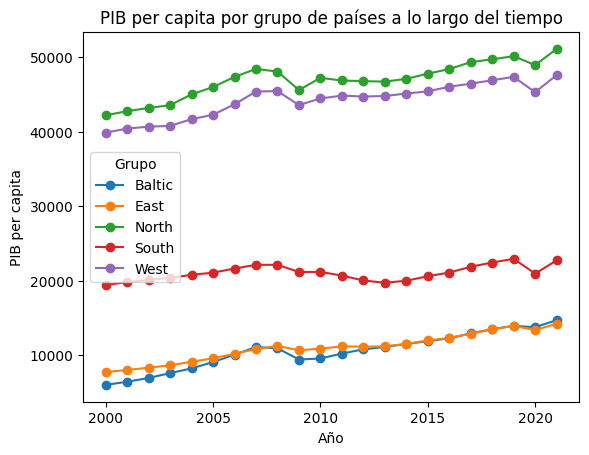

In [124]:
# Agrupar los datos por 'group' y 'TIME_PERIOD' y calcular la media de 'tasa reciclaje %' para cada grupo en cada período de tiempo
grupo_pais_tiempo = df_eurostat_full.groupby(['group', 'TIME_PERIOD'])['PIB per capita'].mean().unstack(level=0)

# Trazar la serie temporal de la tasa de reciclaje promedio para cada grupo de países
grupo_pais_tiempo.plot(marker='o', linestyle='-')

# Etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('PIB per capita')
plt.title('PIB per capita por grupo de países a lo largo del tiempo')
plt.legend(title='Grupo')

# Mostrar el gráfico
plt.show()

Ahora se calculan las tasas de variación de residuos por habitante.

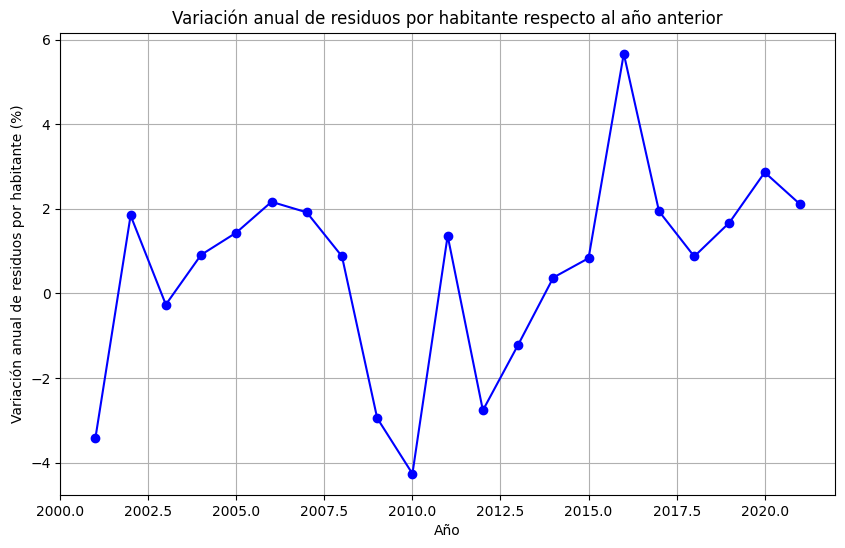

In [166]:
# Calcular la variación anual de los residuos por habitante respecto al año anterior
variacion_anual_residuos = df_eurostat_full.groupby('TIME_PERIOD')['residuos_kg_hab'].mean().pct_change()

# Crear la figura y los ejes del gráfico
plt.figure(figsize=(10, 6))

# Graficar la variación anual de los residuos por habitante
plt.plot(variacion_anual_residuos.index, variacion_anual_residuos.values * 100, marker='o', linestyle='-', color='b')

# Añadir etiquetas y título al gráfico
plt.xlabel('Año')
plt.ylabel('Variación anual de residuos por habitante (%)')
plt.title('Variación anual de residuos por habitante respecto al año anterior')

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.show()


Se calculan las variaciones de PIB per capita

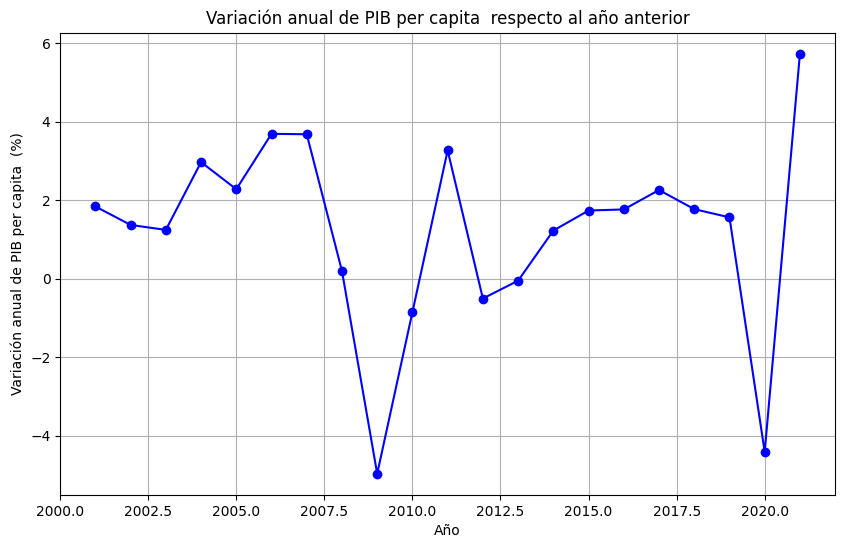

In [125]:
# Calcular la variación anual respecto al año anterior
variacion_anual_PIB = df_eurostat_full.groupby('TIME_PERIOD')['PIB per capita'].mean().pct_change()

# Crear la figura y los ejes del gráfico
plt.figure(figsize=(10, 6))

# Graficar la variación anual 
plt.plot(variacion_anual_PIB.index, variacion_anual_PIB.values * 100, marker='o', linestyle='-', color='b')

# Añadir etiquetas y título al gráfico
plt.xlabel('Año')
plt.ylabel('Variación anual de PIB per capita  (%)')
plt.title('Variación anual de PIB per capita  respecto al año anterior')

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.show()

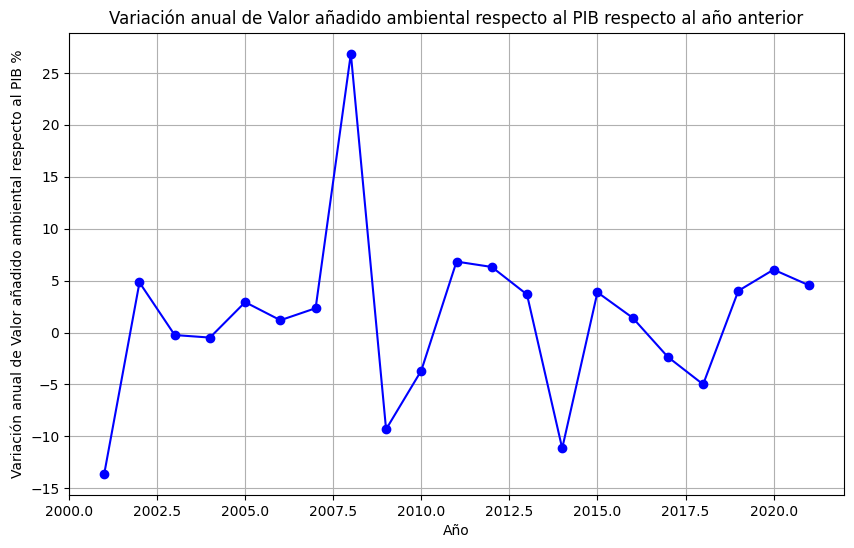

In [172]:
# Calcular la variación anual
variacion_anual_ambiental = df_eurostat_full.groupby('TIME_PERIOD')['Valor añadido ambiental respecto al PIB %'].mean().pct_change()

# Crear la figura y los ejes del gráfico
plt.figure(figsize=(10, 6))

# Graficar la variación anual
plt.plot(variacion_anual_ambiental.index, variacion_anual_ambiental.values * 100, marker='o', linestyle='-', color='b')

# Añadir etiquetas y título al gráfico
plt.xlabel('Año')
plt.ylabel('Variación anual de Valor añadido ambiental respecto al PIB %')
plt.title('Variación anual de Valor añadido ambiental respecto al PIB respecto al año anterior')

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.show()

Se realiza un data frame con las variaciones en los datos

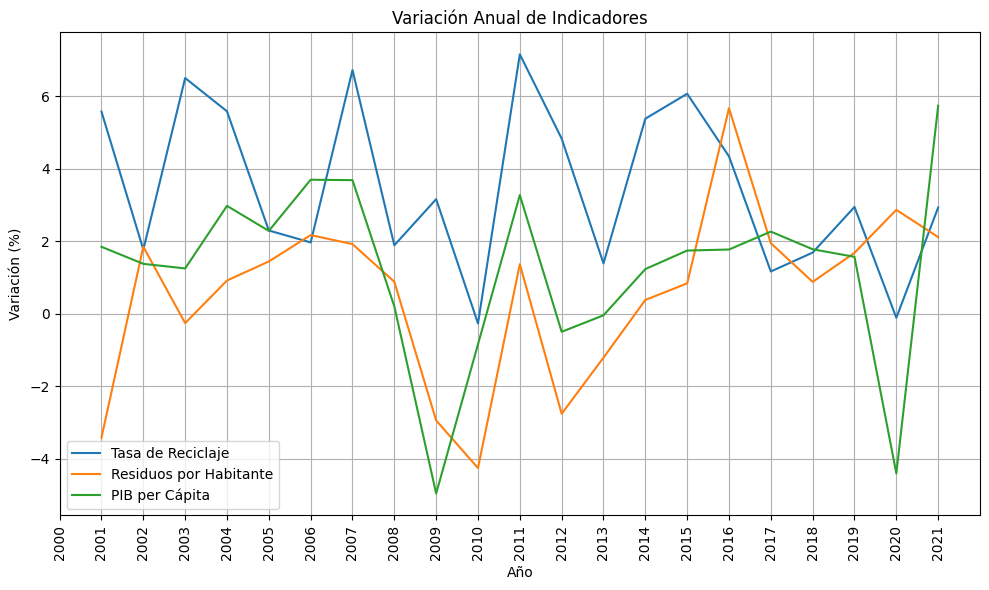

Los resultados se han guardado en el archivo: ../resultados/variaciones_gral.xlsx


In [126]:
# Calcular la variación anual para cada columna
df_variaciones = pd.DataFrame({
    'Año': df_eurostat_full['TIME_PERIOD'].unique(),
    'Variación Tasa de Reciclaje (%)': df_eurostat_full.groupby('TIME_PERIOD')['tasa reciclaje %'].mean().pct_change() * 100,
    'Variación Residuos por Habitante (%)': df_eurostat_full.groupby('TIME_PERIOD')['residuos_kg_hab'].mean().pct_change() * 100,
    'Variación PIB per Cápita (%)': df_eurostat_full.groupby('TIME_PERIOD')['PIB per capita'].mean().pct_change() * 100,
    #'Variación Valor Añadido Ambiental (%)': df_eurostat_full.groupby('TIME_PERIOD')['Valor añadido ambiental respecto al PIB %'].mean().pct_change() * 100
})

# Configurar el gráfico
plt.figure(figsize=(10, 6))

# Trazar la variación anual de la tasa de reciclaje
plt.plot(df_variaciones['Año'], df_variaciones['Variación Tasa de Reciclaje (%)'], label='Tasa de Reciclaje')

# Trazar la variación anual de los residuos por habitante
plt.plot(df_variaciones['Año'], df_variaciones['Variación Residuos por Habitante (%)'], label='Residuos por Habitante')

# Trazar la variación anual del PIB per Cápita
plt.plot(df_variaciones['Año'], df_variaciones['Variación PIB per Cápita (%)'], label='PIB per Cápita')

# Configurar título y etiquetas de los ejes
plt.title('Variación Anual de Indicadores')
plt.xlabel('Año')
plt.ylabel('Variación (%)')

# Establecer el eje x para que muestre cada año individualmente
plt.xticks(df_variaciones['Año'], rotation=90)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar el DataFrame con las variaciones anuales para cada tipo de indicador
df_variaciones

# Especificar la ruta del archivo Excel
excel_file_path = "../resultados/variaciones_gral.xlsx"

# Guardar el DataFrame en un archivo Excel
df_variaciones.to_excel(excel_file_path)

print(f"Los resultados se han guardado en el archivo: {excel_file_path}")

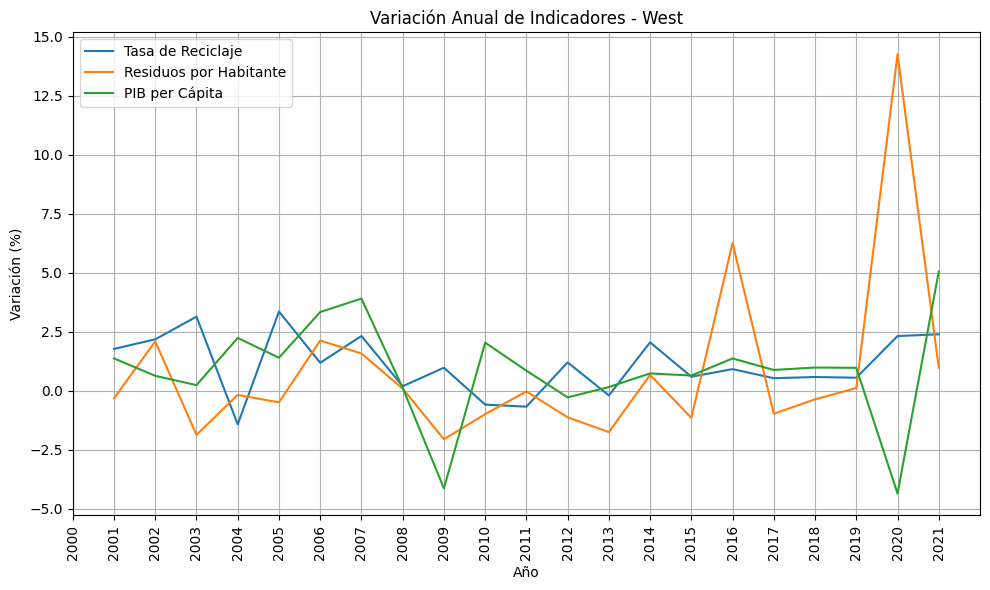

Variaciones anuales para West




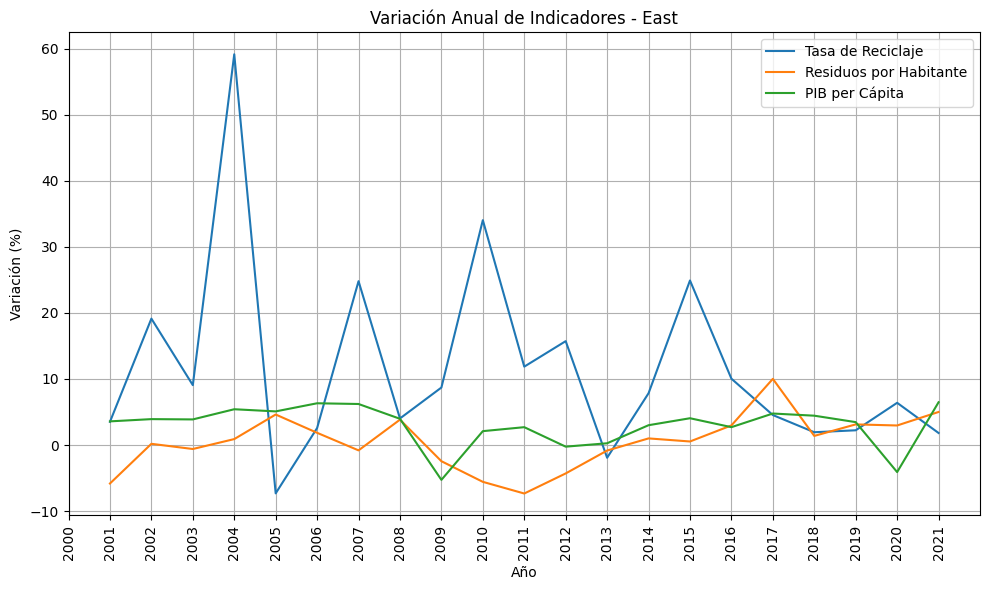

Variaciones anuales para East




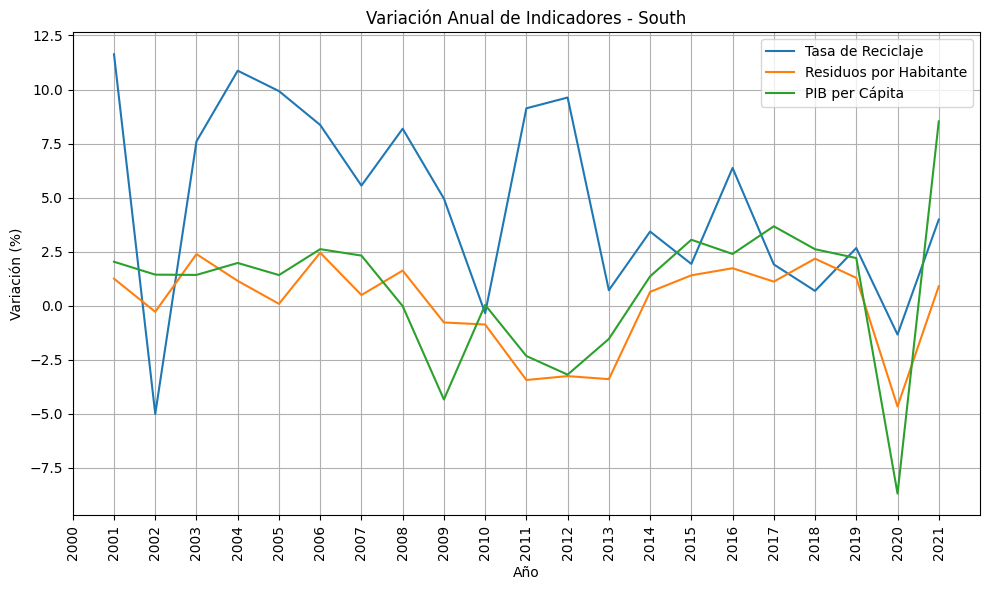

Variaciones anuales para South




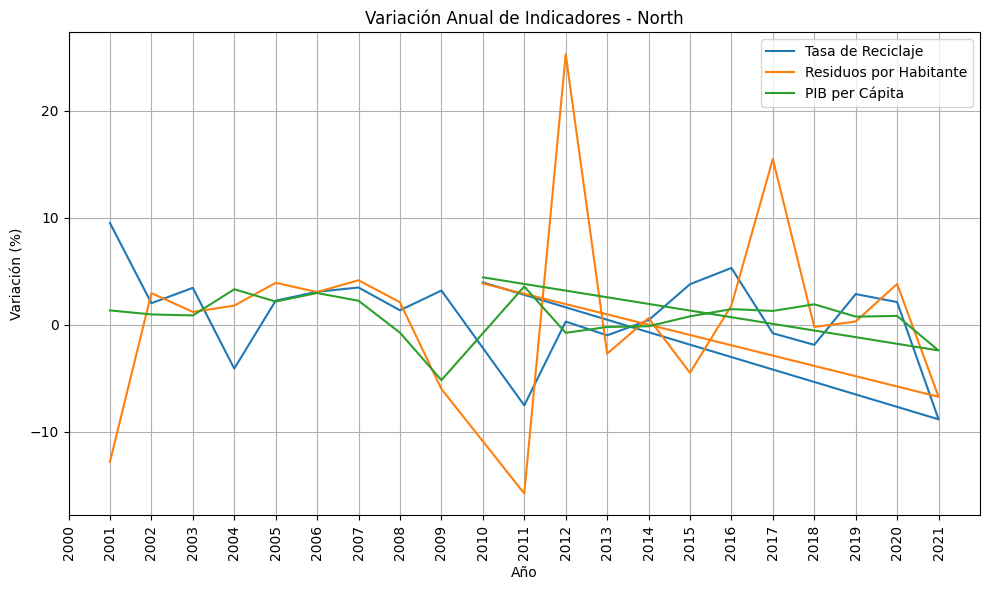

Variaciones anuales para North




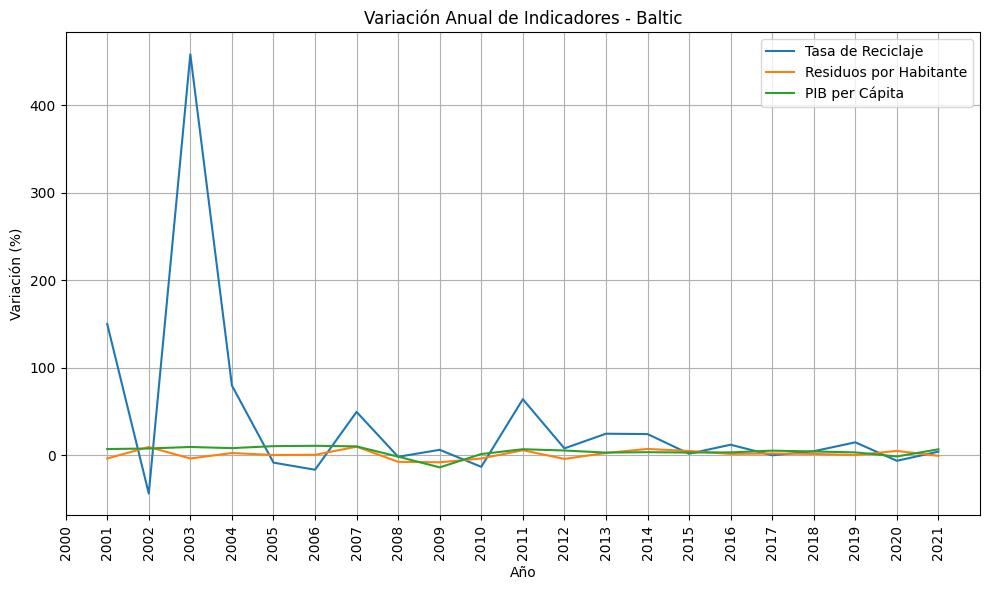

Variaciones anuales para Baltic




In [182]:
# Calcular la variación anual para cada grupo y cada columna
def calcular_variaciones_por_grupo(df, group_column):
    variaciones_por_grupo = {}
    for group_value in df[group_column].unique():
        variaciones = {
            'Año': df[df[group_column] == group_value]['TIME_PERIOD'].unique(),
            f'Variación Tasa de Reciclaje (%) - {group_value}': df[df[group_column] == group_value].groupby('TIME_PERIOD')['tasa reciclaje %'].mean().pct_change() * 100,
            f'Variación Residuos por Habitante (%) - {group_value}': df[df[group_column] == group_value].groupby('TIME_PERIOD')['residuos_kg_hab'].mean().pct_change() * 100,
            f'Variación PIB per Cápita (%) - {group_value}': df[df[group_column] == group_value].groupby('TIME_PERIOD')['PIB per capita'].mean().pct_change() * 100,
            #f'Variación Valor Añadido Ambiental (%) - {group_value}': df[df[group_column] == group_value].groupby('TIME_PERIOD')['Valor añadido ambiental respecto al PIB %'].mean().pct_change() * 100
        }
        variaciones_por_grupo[group_value] = pd.DataFrame(variaciones)
    return variaciones_por_grupo

# Función para graficar y mostrar las variaciones anuales para cada grupo
def graficar_variaciones_por_grupo(variaciones_por_grupo):
    for group_value, df_variaciones in variaciones_por_grupo.items():
        # Configurar el gráfico
        plt.figure(figsize=(10, 6))

        # Trazar la variación anual de la tasa de reciclaje
        plt.plot(df_variaciones['Año'], df_variaciones[f'Variación Tasa de Reciclaje (%) - {group_value}'], label='Tasa de Reciclaje')

        # Trazar la variación anual de los residuos por habitante
        plt.plot(df_variaciones['Año'], df_variaciones[f'Variación Residuos por Habitante (%) - {group_value}'], label='Residuos por Habitante')

        # Trazar la variación anual del PIB per Cápita
        plt.plot(df_variaciones['Año'], df_variaciones[f'Variación PIB per Cápita (%) - {group_value}'], label='PIB per Cápita')

        # Configurar título y etiquetas de los ejes
        plt.title(f'Variación Anual de Indicadores - {group_value}')
        plt.xlabel('Año')
        plt.ylabel('Variación (%)')

        # Establecer el eje x para que muestre cada año individualmente
        plt.xticks(df_variaciones['Año'], rotation=90)

        # Mostrar la leyenda
        plt.legend()

        # Mostrar el gráfico
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Mostrar el DataFrame con las variaciones anuales para cada tipo de indicador
        print(f'Variaciones anuales para {group_value}')
        df_variaciones
        print('\n')

# Calcular las variaciones para cada grupo
variaciones_por_grupo = calcular_variaciones_por_grupo(df_eurostat_full, 'group')

# Graficar y mostrar las variaciones para cada grupo
graficar_variaciones_por_grupo(variaciones_por_grupo)


Dentro del grupo South, vemos el comportamiento de cada país

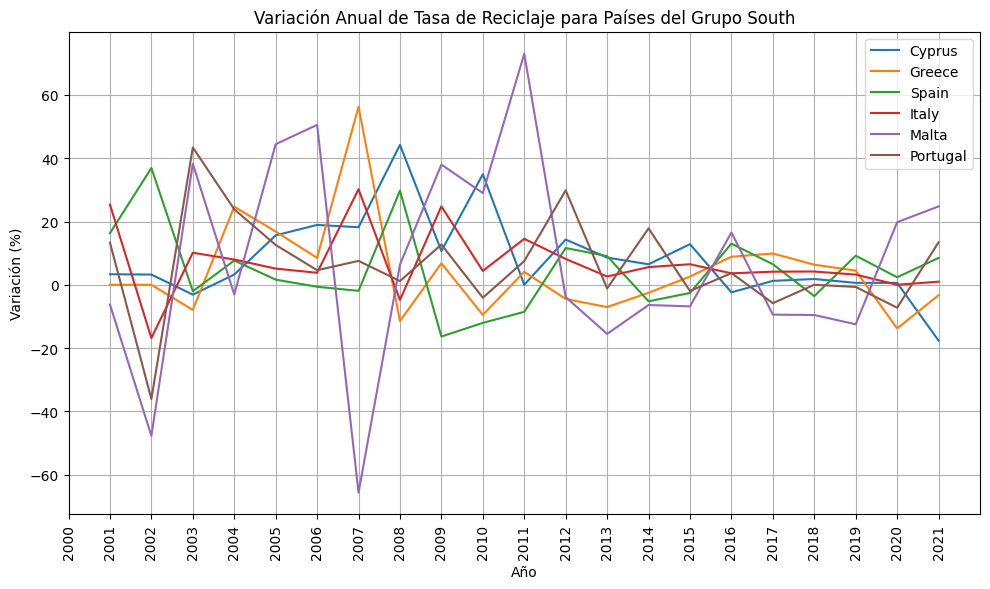

Los resultados se han guardado en el archivo: ../resultados/variaciones_south.xlsx


In [128]:
# Filtrar el DataFrame para el grupo "South"
df_group_south = df_eurostat_full[df_eurostat_full['group'] == 'South']

# Calcular la variación anual para cada columna dentro del grupo "South"
df_variaciones_south = pd.DataFrame({
    'Año': df_group_south['TIME_PERIOD'].unique(),
    'Variación Tasa de Reciclaje (%)': df_group_south.groupby('TIME_PERIOD')['tasa reciclaje %'].mean().pct_change() * 100,
    'Variación Residuos por Habitante (%)': df_group_south.groupby('TIME_PERIOD')['residuos_kg_hab'].mean().pct_change() * 100,
    'Variación PIB per Cápita (%)': df_group_south.groupby('TIME_PERIOD')['PIB per capita'].mean().pct_change() * 100
})

# Configurar el gráfico
plt.figure(figsize=(10, 6))

# Trazar la variación anual de la tasa de reciclaje para cada país dentro del grupo "South"
for country in df_group_south['country'].unique():
    plt.plot(df_variaciones_south['Año'], df_group_south[df_group_south['country'] == country]['tasa reciclaje %'].pct_change() * 100, label=country)

# Configurar título y etiquetas de los ejes
plt.title('Variación Anual de Tasa de Reciclaje para Países del Grupo South')
plt.xlabel('Año')
plt.ylabel('Variación (%)')

# Establecer el eje x para que muestre cada año individualmente
plt.xticks(df_variaciones_south['Año'], rotation=90)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar el DataFrame con las variaciones anuales para cada tipo de indicador
df_variaciones_south


# Especificar la ruta del archivo Excel
excel_file_path = "../resultados/variaciones_south.xlsx"

# Guardar el DataFrame en un archivo Excel
df_variaciones_south.to_excel(excel_file_path)

print(f"Los resultados se han guardado en el archivo: {excel_file_path}")

In [129]:
# Seleccionar las columnas relevantes
columnas_relevantes = ['country', 'group', 'TIME_PERIOD', 'tasa reciclaje %', 'PIB per capita', 'residuos_kg_hab']

# Crear el DataFrame con los datos deseados
df_datos_pais = df_eurostat_full[columnas_relevantes]

# Mostrar el DataFrame
df_datos_pais

# Definir la ruta del archivo Excel
ruta_excel = "../resultados/datos_paises.xlsx"

# Guardar el DataFrame en un archivo Excel
df_datos_pais.to_excel(ruta_excel, index=False)

# Confirmar que se ha guardado correctamente
print(f"guardado")


guardado


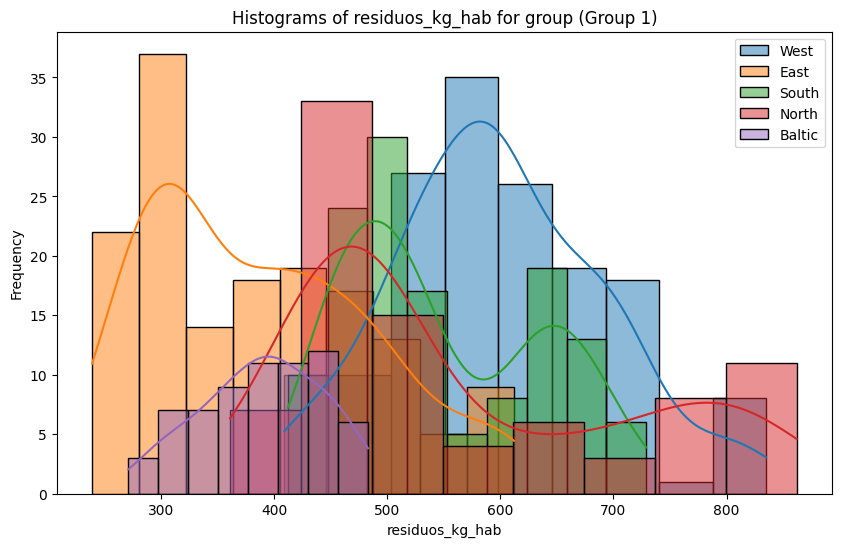

In [131]:
from bootcampviztools import  plot_grouped_histograms
plot_grouped_histograms(df_eurostat_full,"group","residuos_kg_hab",group_size=10)

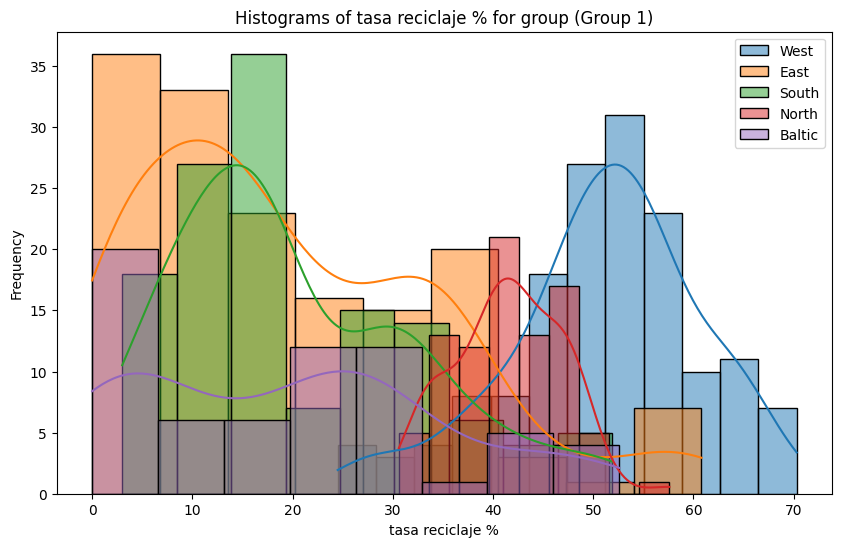

In [132]:
plot_grouped_histograms(df_eurostat_full,"group","tasa reciclaje %",group_size=10)

In [124]:
columnas_categoricas = ['country', 'group', 'Grupo residuos/hab', 'Rango de residuos (kg/hab)']
columnas_numericas = ['TIME_PERIOD', 'tasa reciclaje %', 'residuos_kg_hab', 'PIB per capita', 'Valor añadido ambiental respecto al PIB %']


### Análisis multivariante.

3. **Análisis multivariante**: ver de manera gráfica la relación de todas con todas.

    3.1 Gráficas: heatmap de correlación, grid de gráficas mediante pairplot.

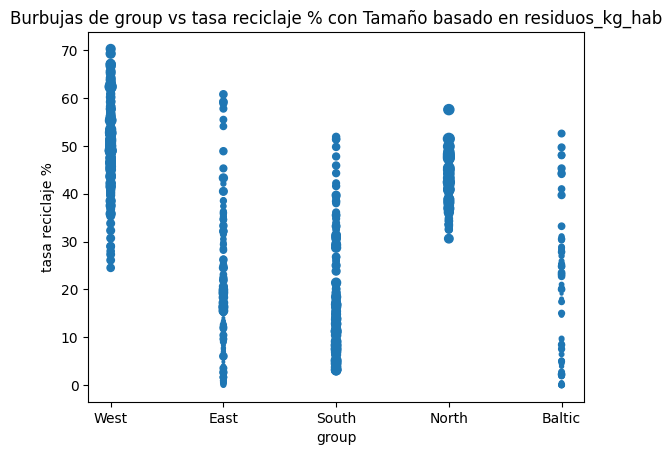

In [133]:
from bootcampviztools import bubble_plot
bubble_plot(df_eurostat_full, "group", "tasa reciclaje %","residuos_kg_hab",scale = 10)

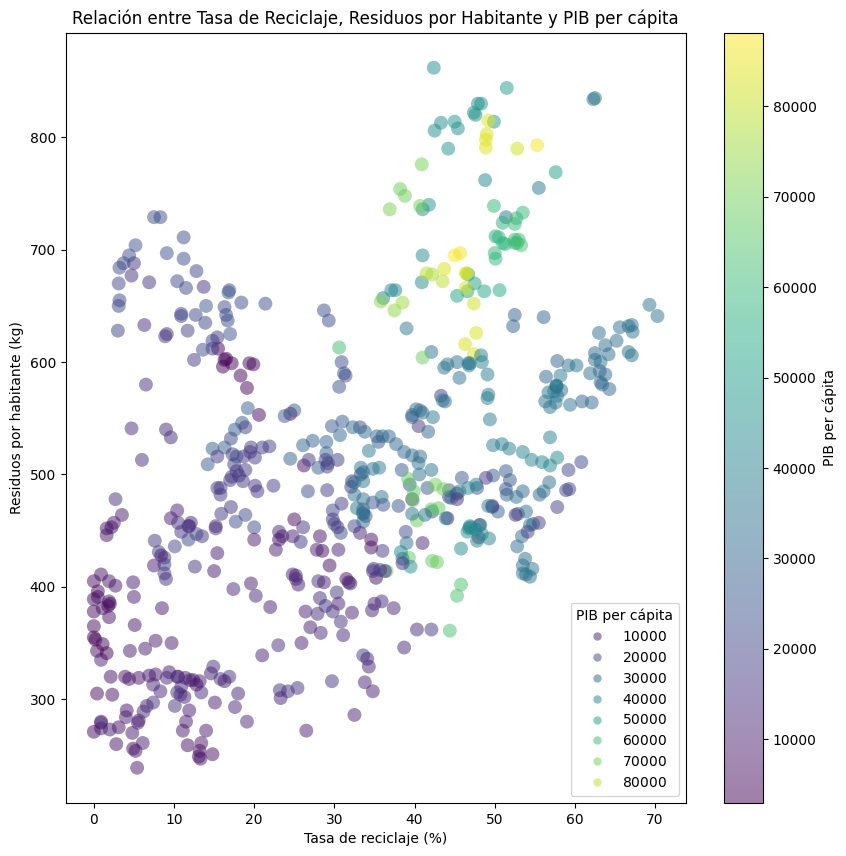

In [134]:
# Obtener los datos para el gráfico
tasa_reciclaje = df_eurostat_full["tasa reciclaje %"]
residuos_kg_hab = df_eurostat_full["residuos_kg_hab"]

# Definir el tamaño del área para las ciudades como el PIB per capita
PIB_per_capita = df_eurostat_full["PIB per capita"]

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 10))
scatter = plt.scatter(tasa_reciclaje, residuos_kg_hab, c=PIB_per_capita, cmap="viridis", s=100, linewidth=0, alpha=0.5)

# Añadir etiquetas y barra de colores
plt.xlabel("Tasa de reciclaje (%)")
plt.ylabel("Residuos por habitante (kg)")
plt.colorbar(label="PIB per cápita")

# Añadir título
plt.title("Relación entre Tasa de Reciclaje, Residuos por Habitante y PIB per cápita")

# Añadir leyenda
plt.legend(*scatter.legend_elements(), title="PIB per cápita")

# Mostrar el gráfico
plt.show()


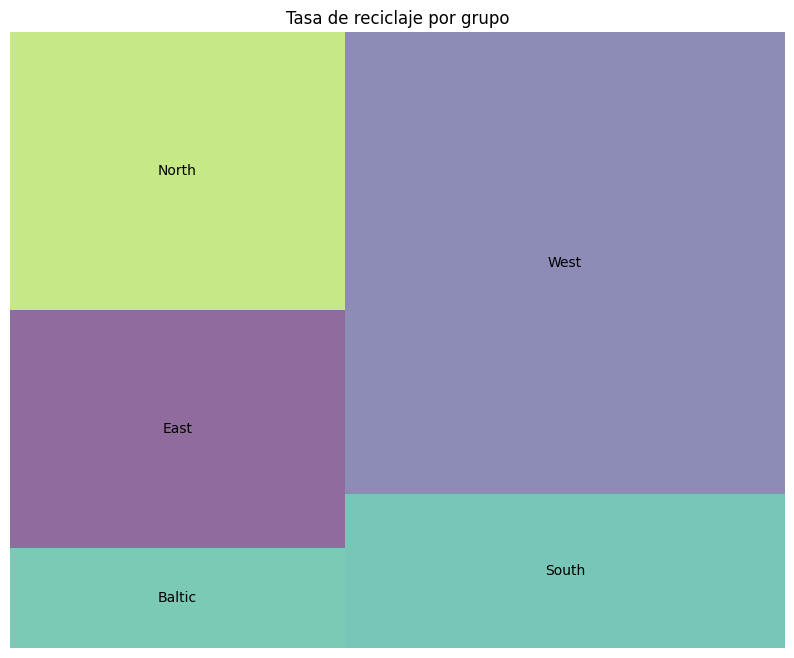

In [136]:
import squarify

# Agrupar los datos por grupo y calcular la suma de la tasa de reciclaje
datos = df_eurostat_full.groupby('group', as_index=False)['tasa reciclaje %'].sum()

plt.figure(figsize=(10, 8))
squarify.plot(sizes=datos['tasa reciclaje %'], label=datos['group'], alpha=0.6)
plt.title("Tasa de reciclaje por grupo")
plt.axis("off")
plt.show()

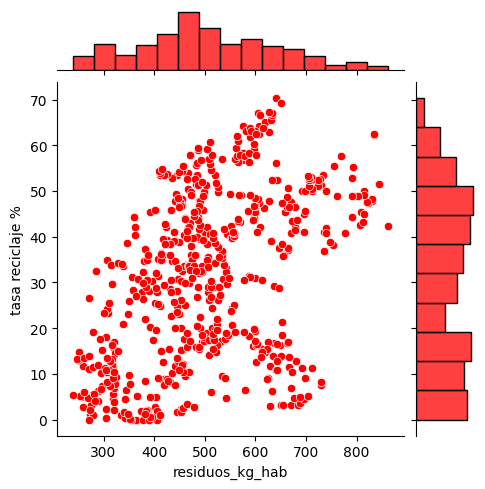

In [135]:
sns.jointplot(x=df_eurostat_full["residuos_kg_hab"],
              y=df_eurostat_full["tasa reciclaje %"],
              color='red',
              height=5)

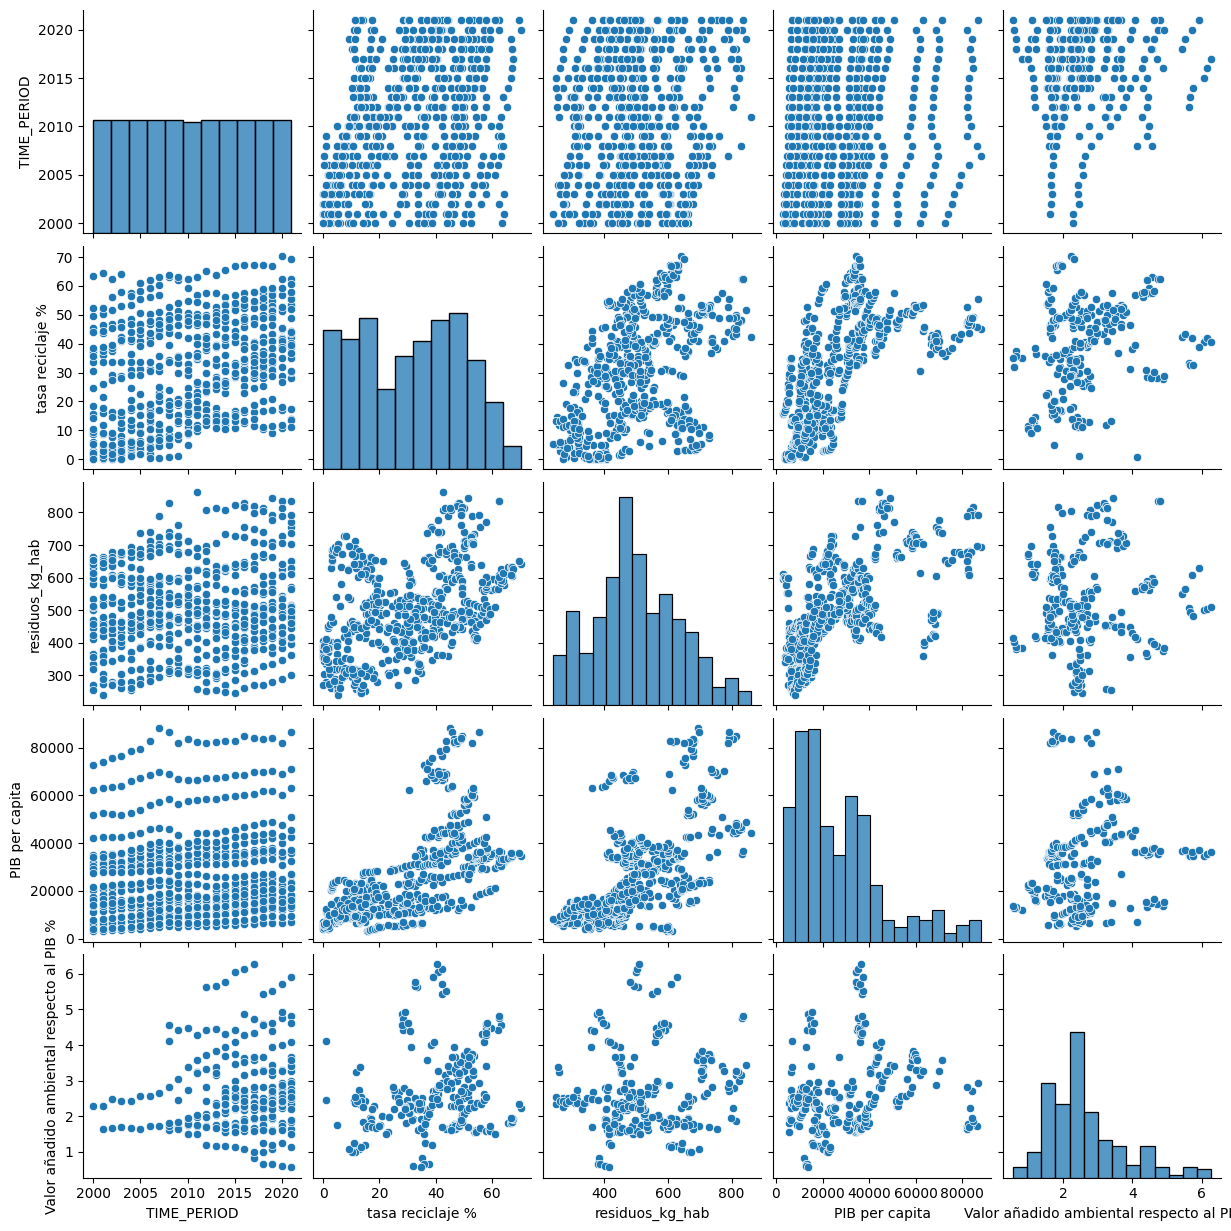

In [209]:
sns.pairplot(df_eurostat_full)

Heat map de correlaciones

<Axes: >

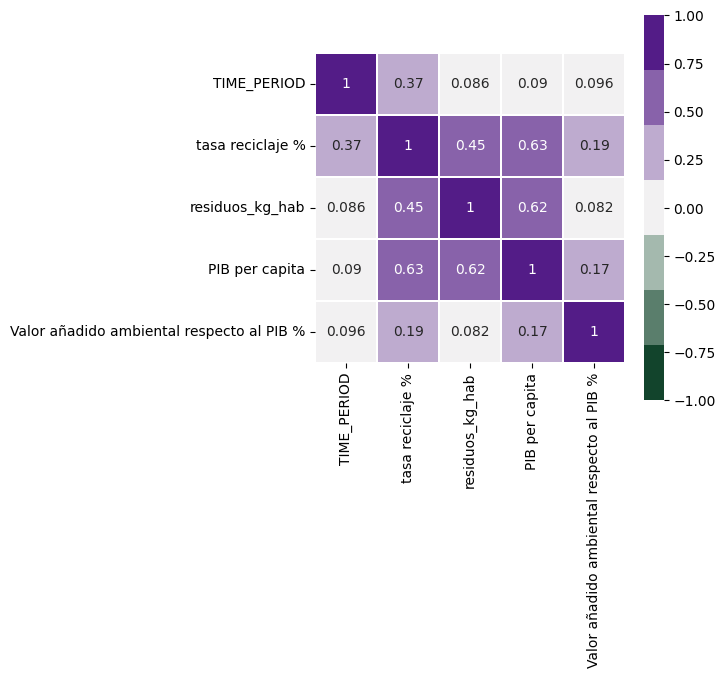

In [211]:
matriz_corr = df_eurostat_full.corr(numeric_only= True)

plt.figure(figsize=(5,5))
sns.heatmap(matriz_corr,
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.1,
            annot=True)

Guardar todo el data frame revisado

In [216]:
# Especificar la ruta del archivo Excel
excel_file_path = "../data/full.xlsx"

# Guardar el DataFrame en un archivo Excel
df_eurostat_full.to_excel(excel_file_path)

print(f"Los resultados se han guardado en el archivo: {excel_file_path}")

Los resultados se han guardado en el archivo: ../data/full.xlsx


### 5. Resultados
21. **Contraste con hipótesis**: finalmente, analizaremos los resultados obtenidos del análisis, buscaremos insights y comprobaremos si responde positivamente o negativamente a nuestra hipótesis inicial. ¿Hemos respondido a la necesidad de negocio planteada al principio? De ser así, continuaríamos con el siguiente paso y en caso contrario, habrá que volver a los puntos 3 y 4 (requerimientos de los datos).
22. **Plan de acción**: ¿qué vamos a hacer en función de los resultados? Esto es algo que ya deberíamos tener claro antes del análisis pero puede variar en función de los resultados.
23. **Productivización**: ¿es necesario que esta información esté en un dashboard alojado en un hosting de la empresa para que sea consumible por más empleados?
24. **Comunicación, presentación de resultados**: una vez ya hemos realizado el análisis, obtenido resultados y contrastado hipótesis, queda enseñarlo. Se realiza una presentación con un buen hilo conductor desde el problema inicial hasta las conclusiones basadas en los datos.
25. **Transmitir conocimiento**: documentación/charlas de descubrimientos sobre los datos, insights o tecnologías.

Se ha trabajado sobre hipótesis que se han ido redefiniendo en estas tres.

hipotesis_1 = "La tasa de reciclado está relacionada con la generación de residuos pero reciclamos menos de lo que aumentamos la generación"
hipotesis_2 = "La educación favorece mejores tasas de reciclado"<br>
hipotesis_3 = "Los países por ser ricos no generan mejores tasas de reciclado aunque ayuda"<br>

Hemos descubierto las correlaciones estrechas en el caso de tasa de reciclado con generación de residuos y con PIB per capita. Ahora bien, hay matices dentro de los grupos de países, siendo díficil establecer un patrón claro, incluso cambia en función del período del tiempo. En el caso de la educación, evaluada con el valor añadido ambiental se ha visto una menor correlación. Aunque en algunos países da una correlación positiva alta.

Con estos resultados, se puede plantear un análisis con nuevas variables que puedan considerarse, junto a transmitir un conocimiento en torno a qué determina mejores tasas de reciclado en la UE y cómo hacer para mejorar los resultados de todos, atendiendo a los mejores resultados.

El data set creado se ha generado como excel y guardado en una carpeta dentro de Data para consulta y futuros análisis. También se plantea como evolutivo de este EDAD incorporarlos a Power BI y actualizarlos períodicamente.

